This is for reference. Don't remove.

Dataset for training: /content/drive/MyDrive/drought_data/processed/drought_train_normalized_imp.nc

Dataset for validation: /content/drive/MyDrive/drought_data/processed/drought_val_normalized_imp.nc

Dataset for test:  /content/drive/MyDrive/drought_data/processed/drought_test_normalized_imp.nc

Summary: /content/drive/MyDrive/drought_data/processed/normalization_summary.csv

Raw dataset: /content/drive/MyDrive/drought_data/chaosbench_drought_imp_variables.nc

Interpolated dataset: /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled_complete.nc


Zip file with files for normalization/denormalization: /content/drive/MyDrive/climatology_norm.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
nc_file = "/content/drive/MyDrive/drought_data/chaosbench_drought_imp_variables.nc"
ds = xr.open_dataset(nc_file)
print(ds)

<xarray.Dataset> Size: 35MB
Dimensions:    (time: 4017, latitude: 14, longitude: 14)
Coordinates:
  * latitude   (latitude) float32 56B 49.5 48.0 46.5 45.0 ... 33.0 31.5 30.0
  * longitude  (longitude) float32 56B 255.0 256.5 258.0 ... 271.5 273.0 274.5
  * time       (time) datetime64[ns] 32kB 2013-01-01 2013-01-02 ... 2023-12-31
Data variables:
    z500       (time, latitude, longitude) float32 3MB ...
    t850       (time, latitude, longitude) float64 6MB ...
    e          (time, latitude, longitude) float32 3MB ...
    evavt      (time, latitude, longitude) float32 3MB ...
    lai_lv     (time, latitude, longitude) float32 3MB ...
    pev        (time, latitude, longitude) float32 3MB ...
    swvl2      (time, latitude, longitude) float32 3MB ...
    swvl3      (time, latitude, longitude) float32 3MB ...
    t2m        (time, latitude, longitude) float32 3MB ...
    tp         (time, latitude, longitude) float32 3MB ...


In [ ]:
# Convert to pandas DataFrame
df = ds.to_dataframe().reset_index()

# Display the first few rows
print(df.head())
df.count()

        time  latitude  longitude         z500        t850         e  \
0 2013-01-01      49.5      255.0  5390.891602  265.440857 -0.000012   
1 2013-01-01      49.5      256.5  5380.968750  261.706685  0.000005   
2 2013-01-01      49.5      258.0  5371.045898  262.607490  0.000021   
3 2013-01-01      49.5      259.5  5364.596680  260.883263  0.000027   
4 2013-01-01      49.5      261.0  5356.658203  259.414992  0.000012   

          evavt    lai_lv       pev     swvl2     swvl3         t2m        tp  
0 -4.351605e-07  0.701642 -0.000012  0.277850  0.216583  263.341553  0.000198  
1 -2.614688e-07  0.701642  0.000006  0.274946  0.211290  258.271484  0.000110  
2 -8.754432e-08  0.629175  0.000020  0.262317  0.210406  248.796722  0.000018  
3  8.638017e-08  0.836157  0.000028  0.207565  0.158569  248.211411  0.000018  
4 -3.912486e-06  1.662823  0.000013  0.224684  0.192596  249.832382  0.000136  


,0
time,787332
latitude,787332
longitude,787332
z500,787332
t850,787332
e,787332
evavt,787332
lai_lv,787332
pev,787332
swvl2,787332


In [ ]:
zero_values = (df == 0).sum()
print(zero_values)

time              0
latitude          0
longitude         0
z500              0
t850              0
e             12051
evavt         12051
lai_lv        92901
pev           12051
swvl2         12051
swvl3         12051
t2m           12051
tp           172571
dtype: int64


In [ ]:
import pandas as pd
csv_file_path = "/content/chaosbench_drought_imp_variables.csv"
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")
# Read the CSV into a DataFrame
df_csv = pd.read_csv(csv_file_path)
print(df_csv.head())


CSV file saved at: /content/chaosbench_drought_imp_variables.csv
         time  latitude  longitude       z500        t850         e  \
0  2013-01-01      49.5      255.0  5390.8916  265.440857 -0.000012   
1  2013-01-01      49.5      256.5  5380.9688  261.706685  0.000005   
2  2013-01-01      49.5      258.0  5371.0460  262.607490  0.000021   
3  2013-01-01      49.5      259.5  5364.5967  260.883263  0.000027   
4  2013-01-01      49.5      261.0  5356.6580  259.414992  0.000012   

          evavt    lai_lv       pev     swvl2     swvl3        t2m        tp  
0 -4.351605e-07  0.701642 -0.000012  0.277850  0.216583  263.34155  0.000198  
1 -2.614688e-07  0.701642  0.000006  0.274946  0.211290  258.27148  0.000110  
2 -8.754432e-08  0.629175  0.000020  0.262317  0.210406  248.79672  0.000018  
3  8.638017e-08  0.836157  0.000028  0.207565  0.158569  248.21141  0.000018  
4 -3.912486e-06  1.662823  0.000013  0.224684  0.192596  249.83238  0.000136  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading existing interim results from /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc
Already processed variables: ['z500', 't850', 't2m']

Skipping z500 (already processed)

Skipping t850 (already processed)

Processing variable 3/10: e

Processing e
Original zeros: 12051

===== Zero Analysis for e =====
Total zeros: 12051
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


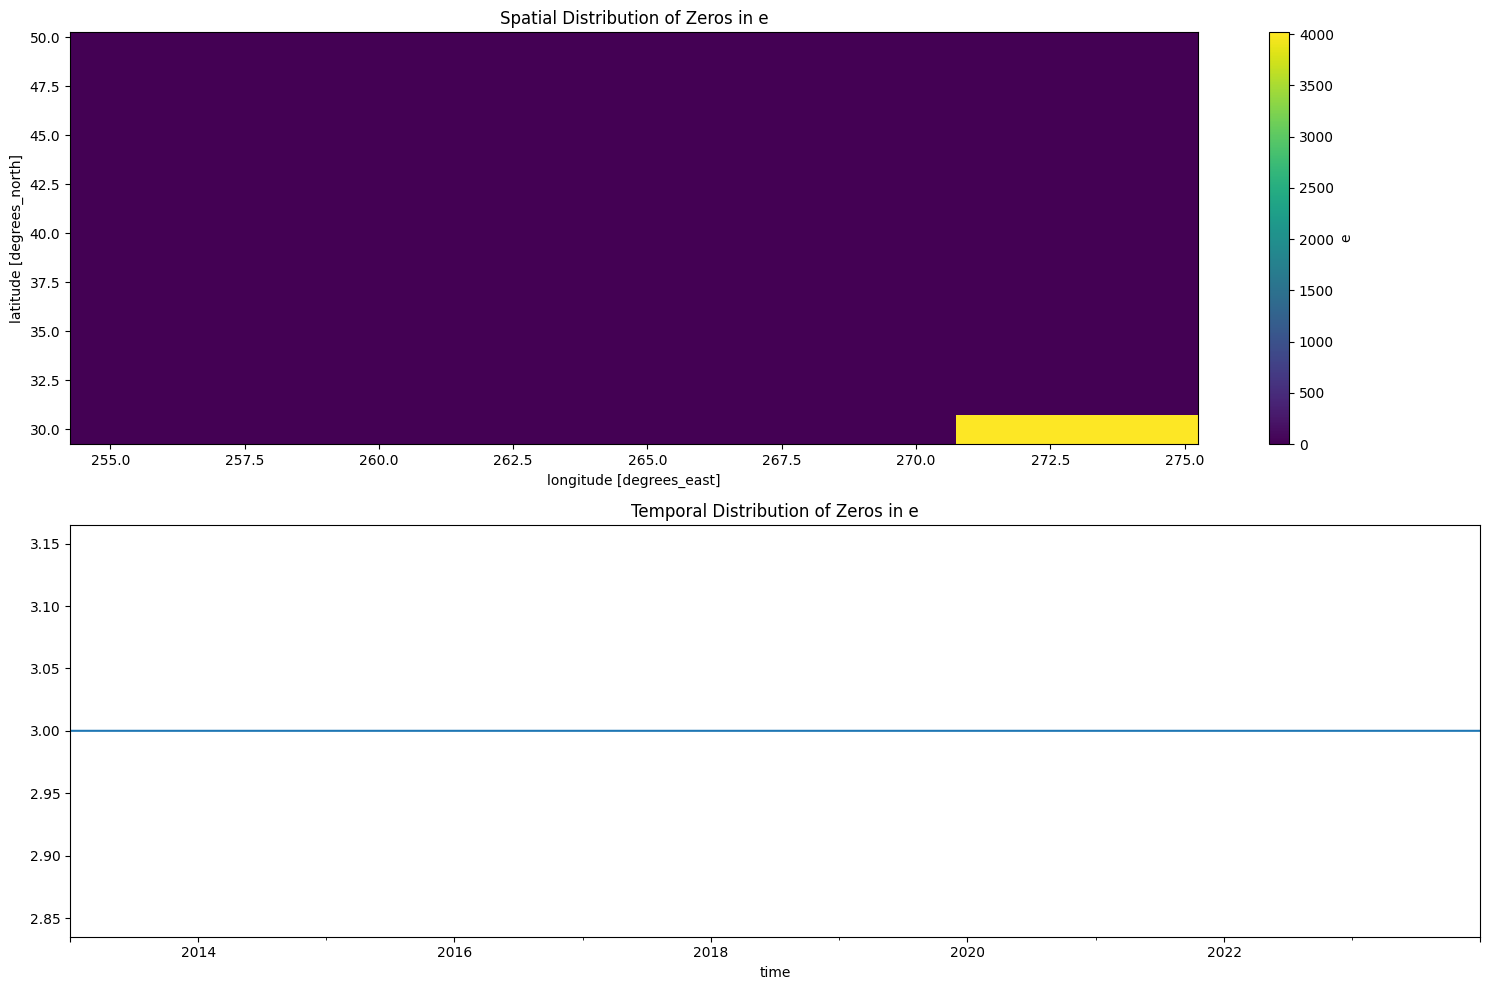

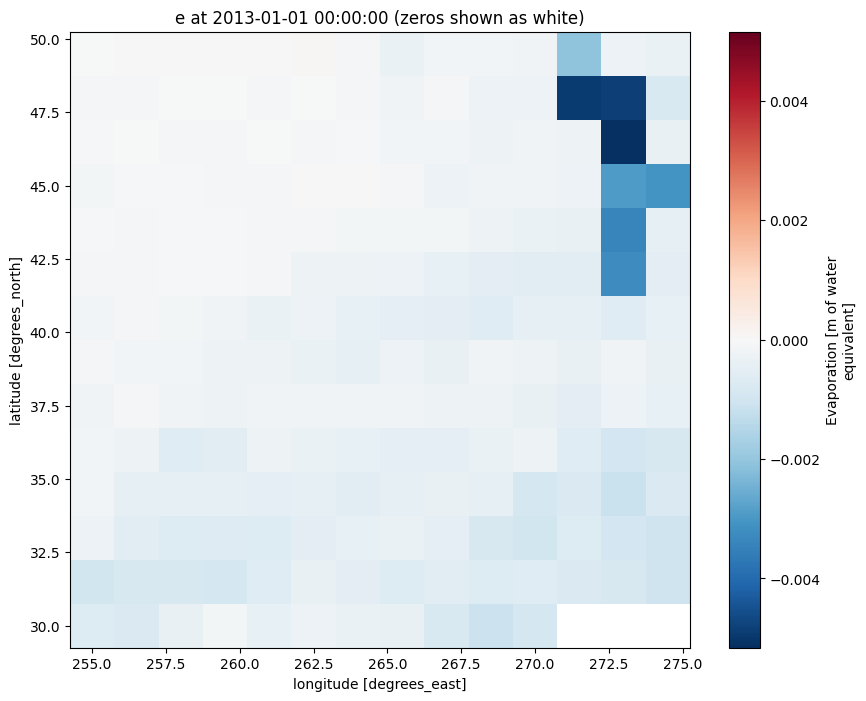

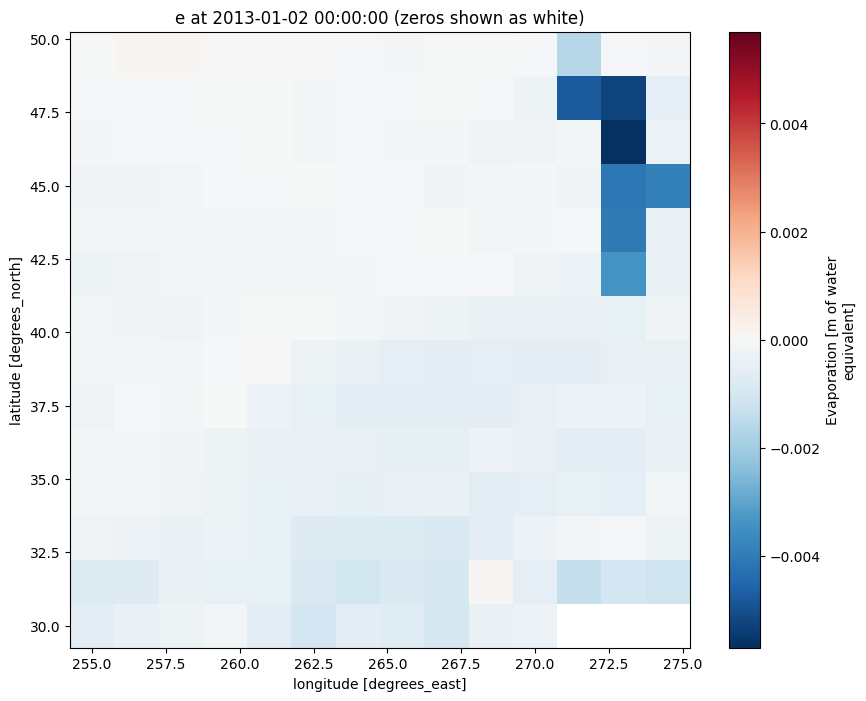


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 12051 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 12051 (100.00%)

Generating validation plots...


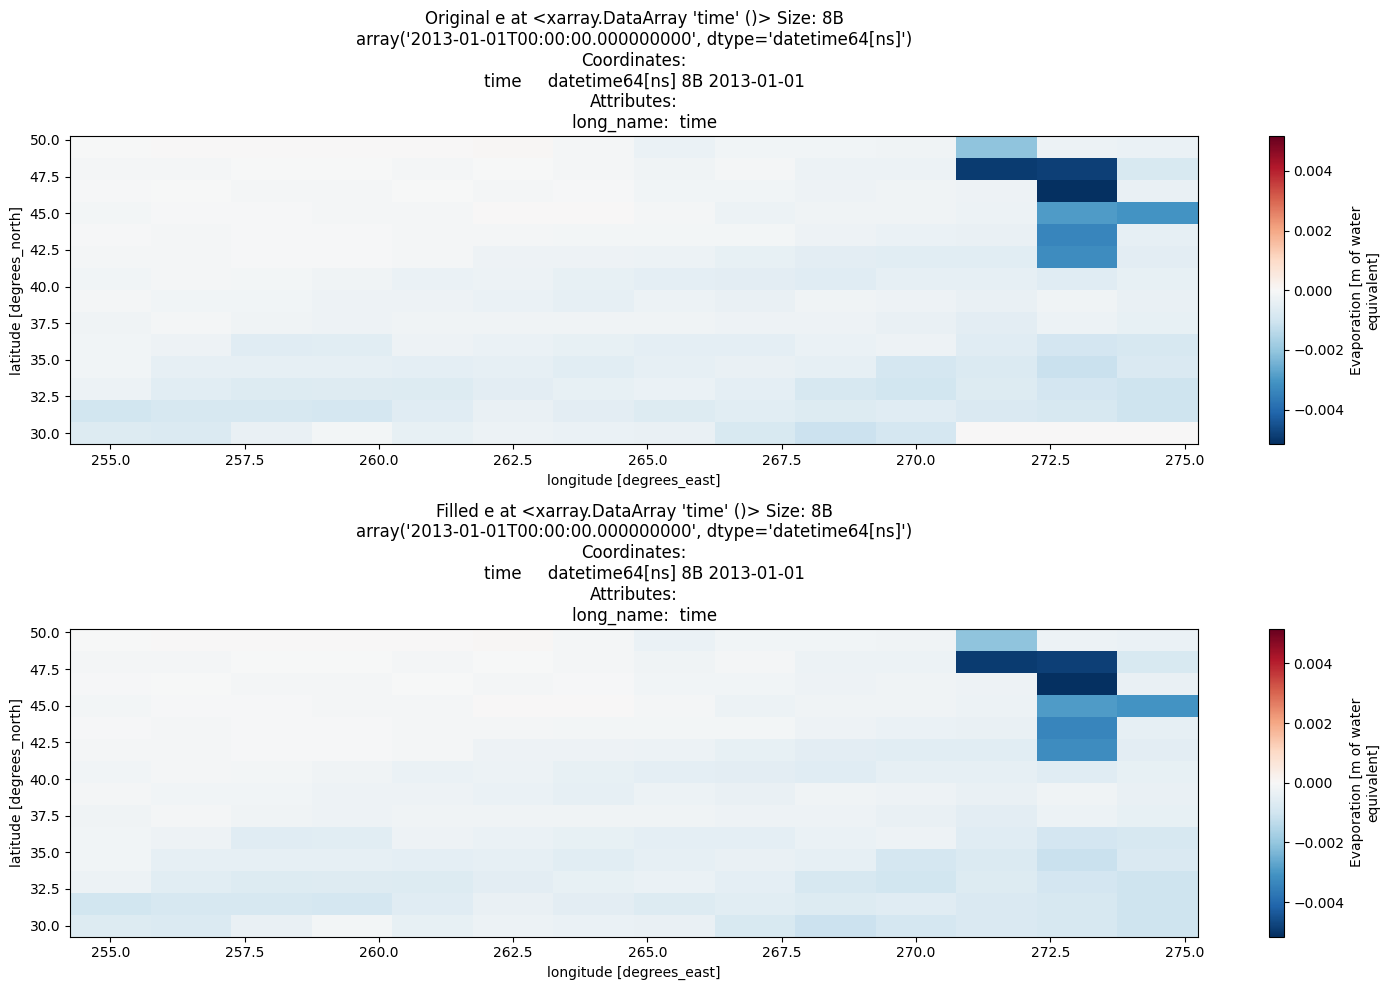

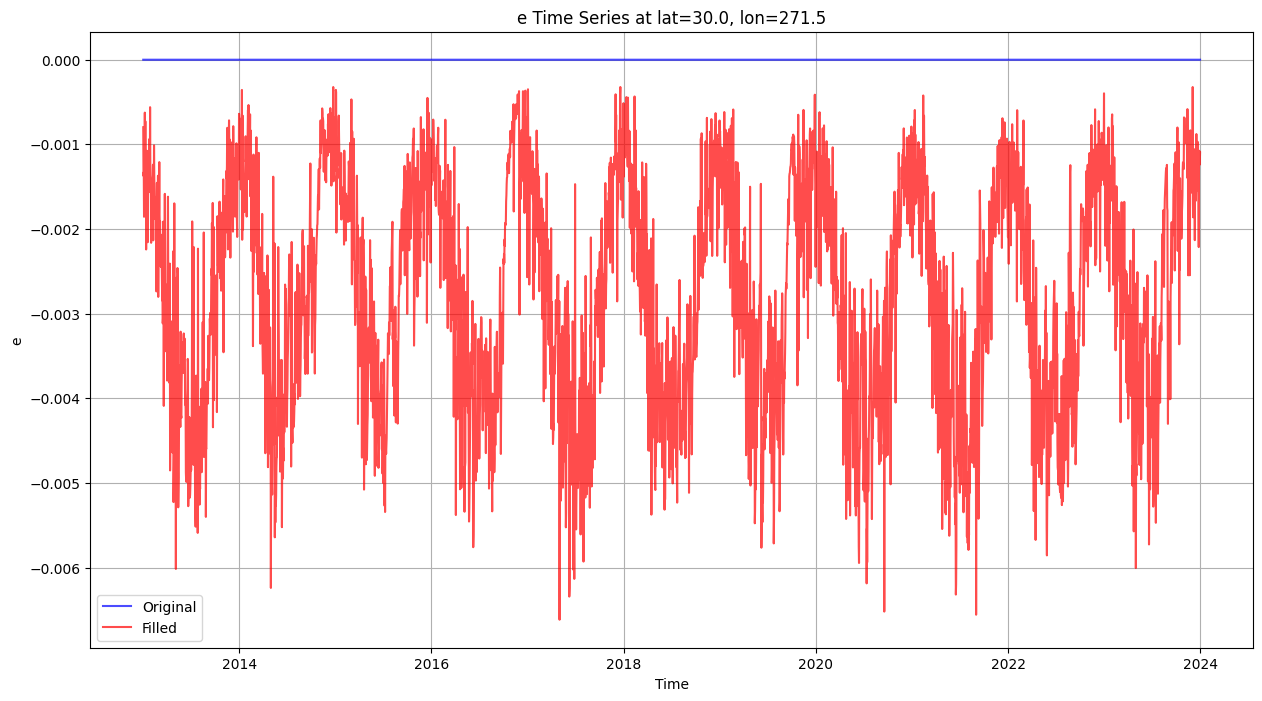


Processing completed in 127.1 seconds (2.1 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Processing variable 4/10: evavt

Processing evavt
Original zeros: 12051

===== Zero Analysis for evavt =====
Total zeros: 12051
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


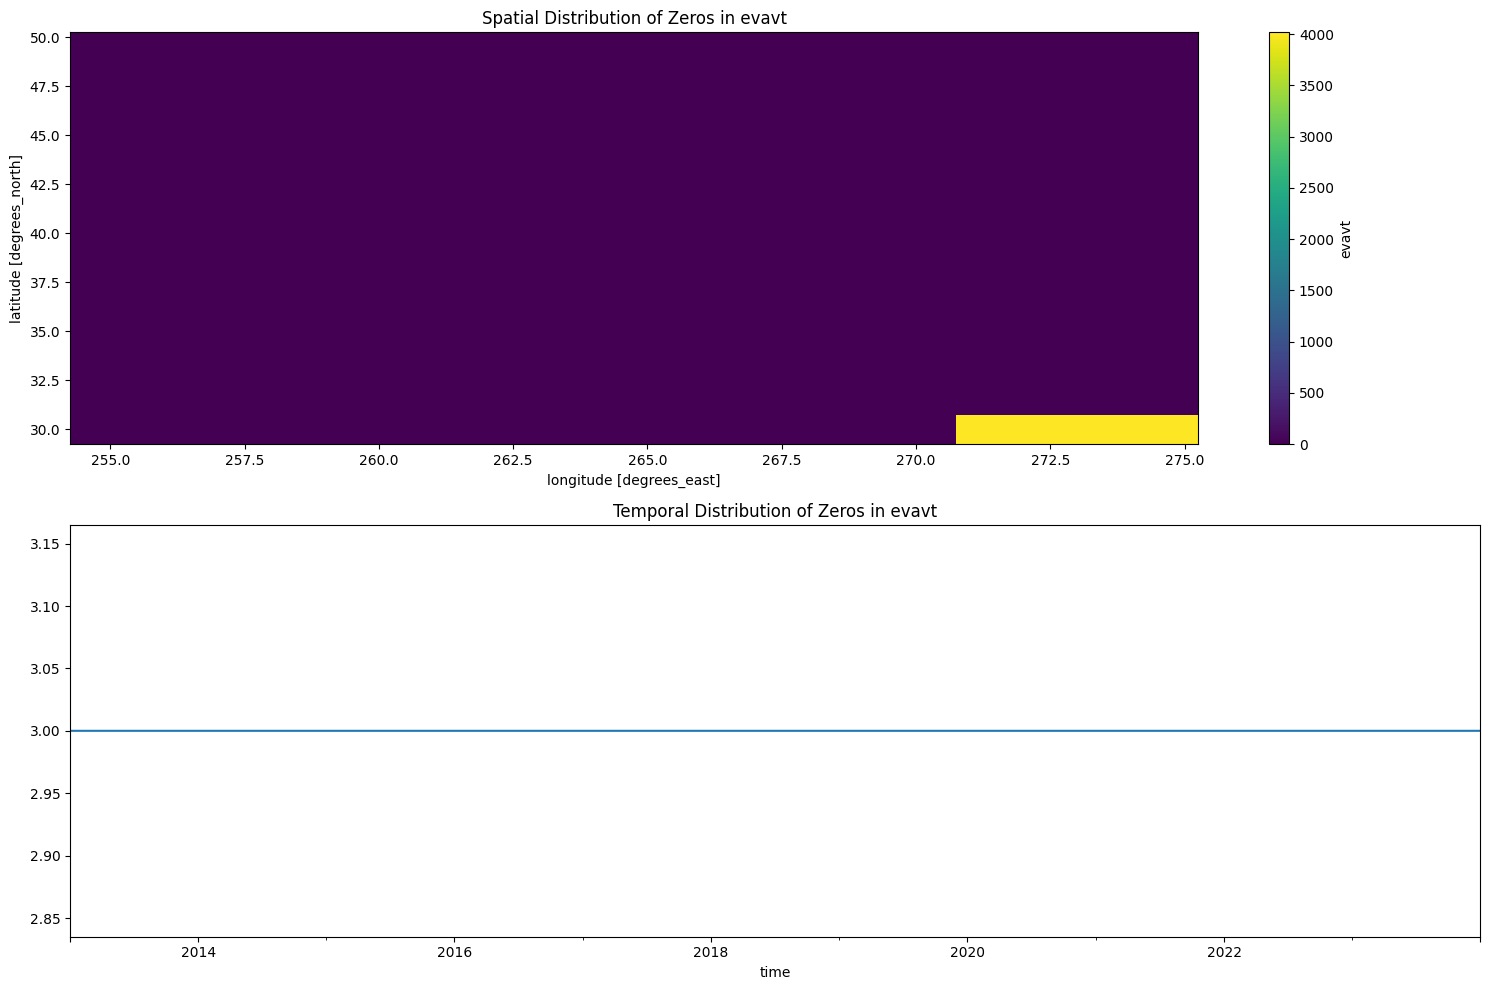

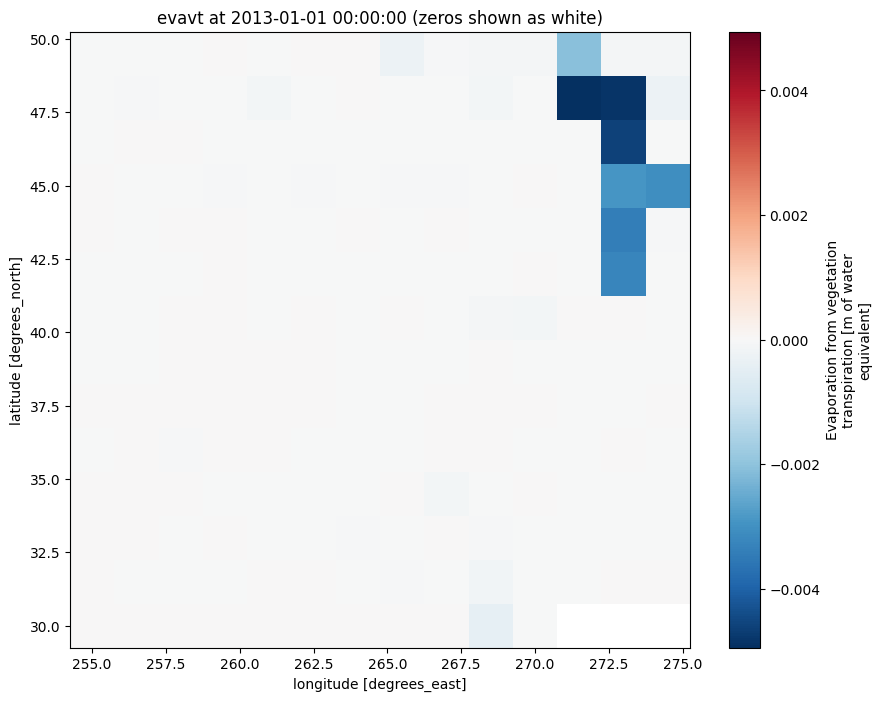

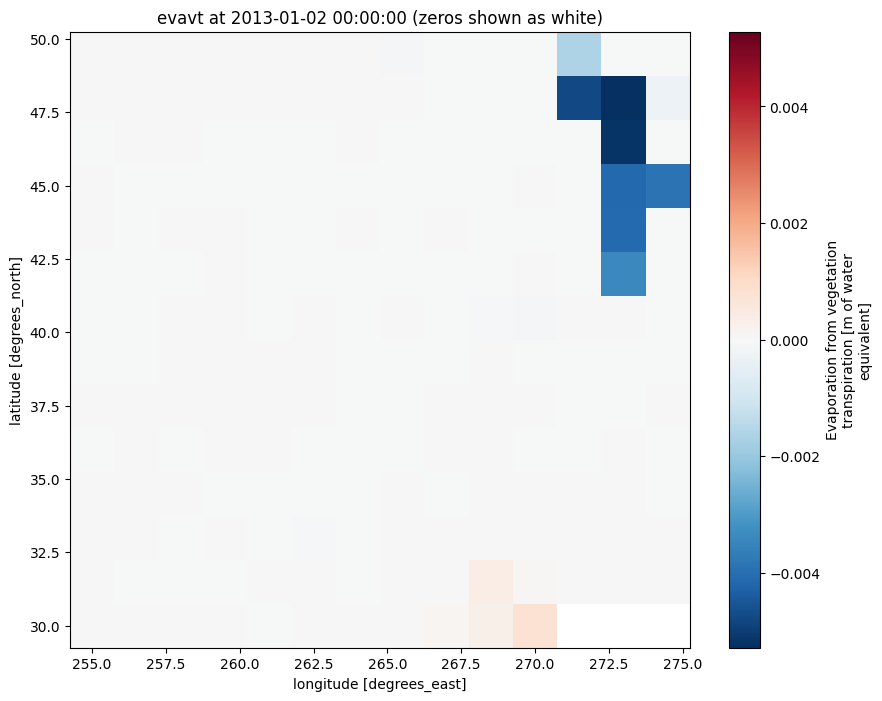


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 12051 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 12051 (100.00%)

Generating validation plots...


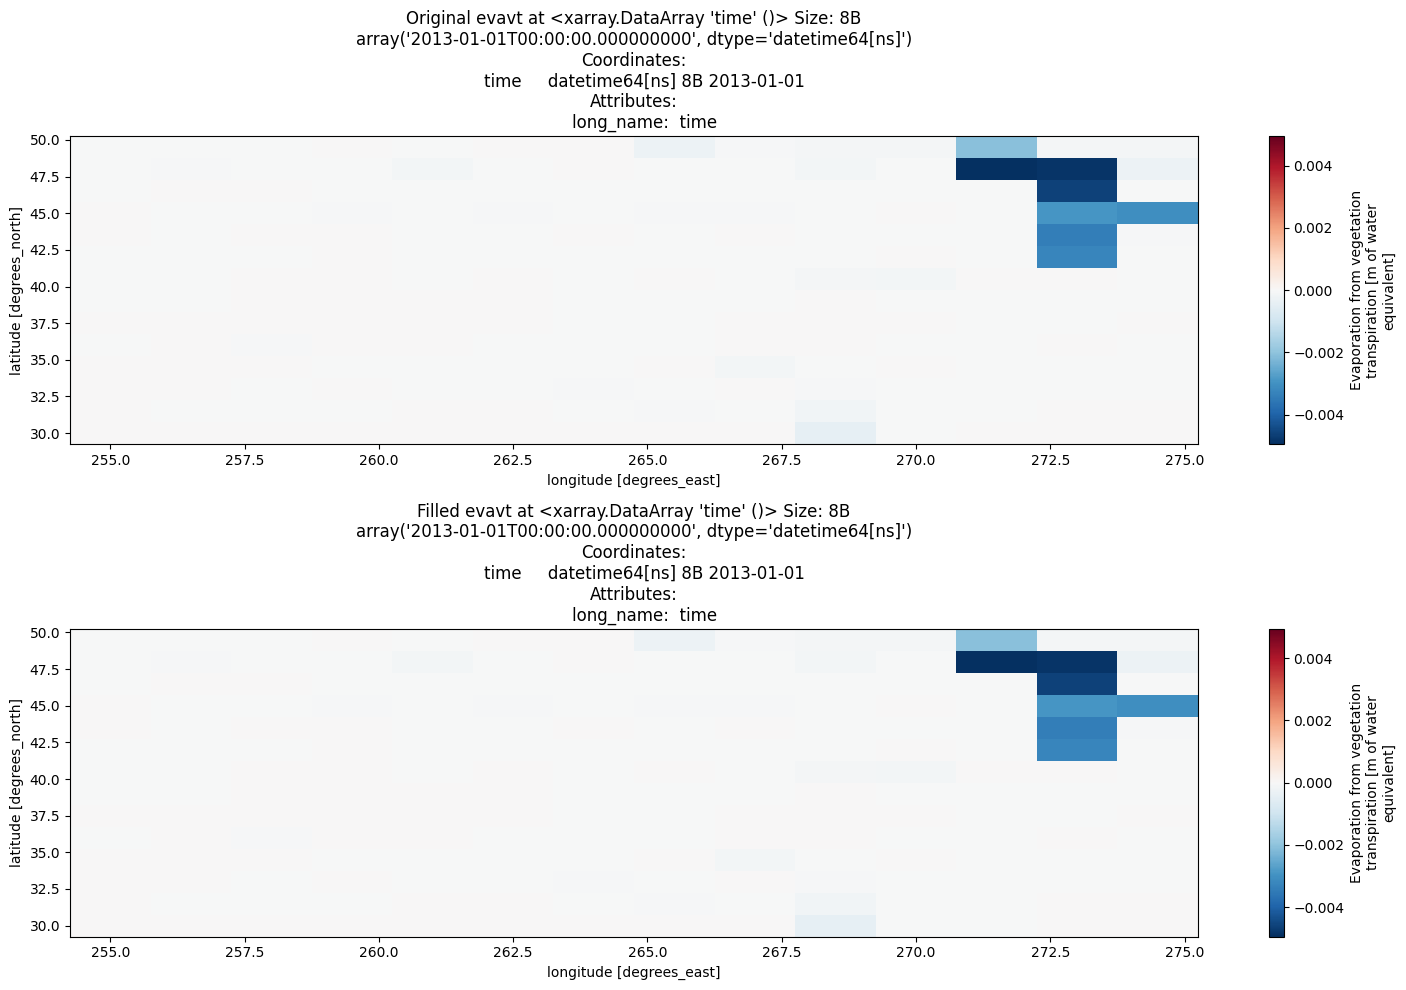

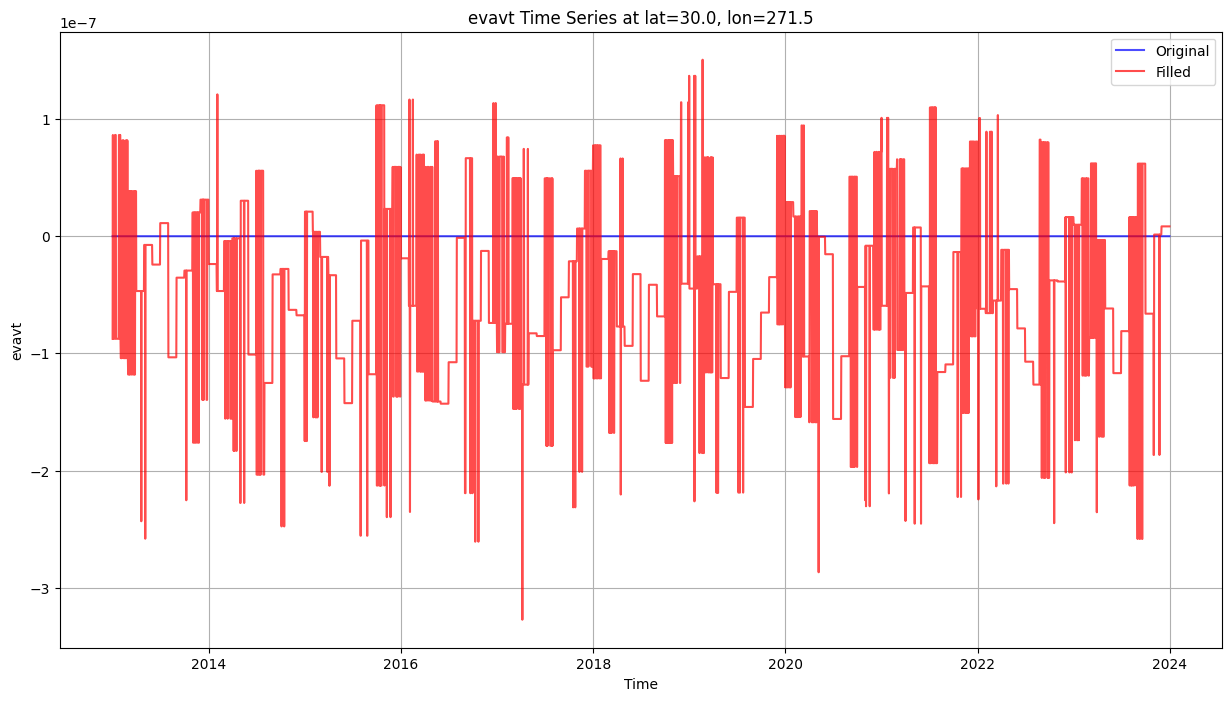


Processing completed in 141.1 seconds (2.4 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Processing variable 5/10: lai_lv

Processing lai_lv
Original zeros: 92901

===== Zero Analysis for lai_lv =====
Total zeros: 92901
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


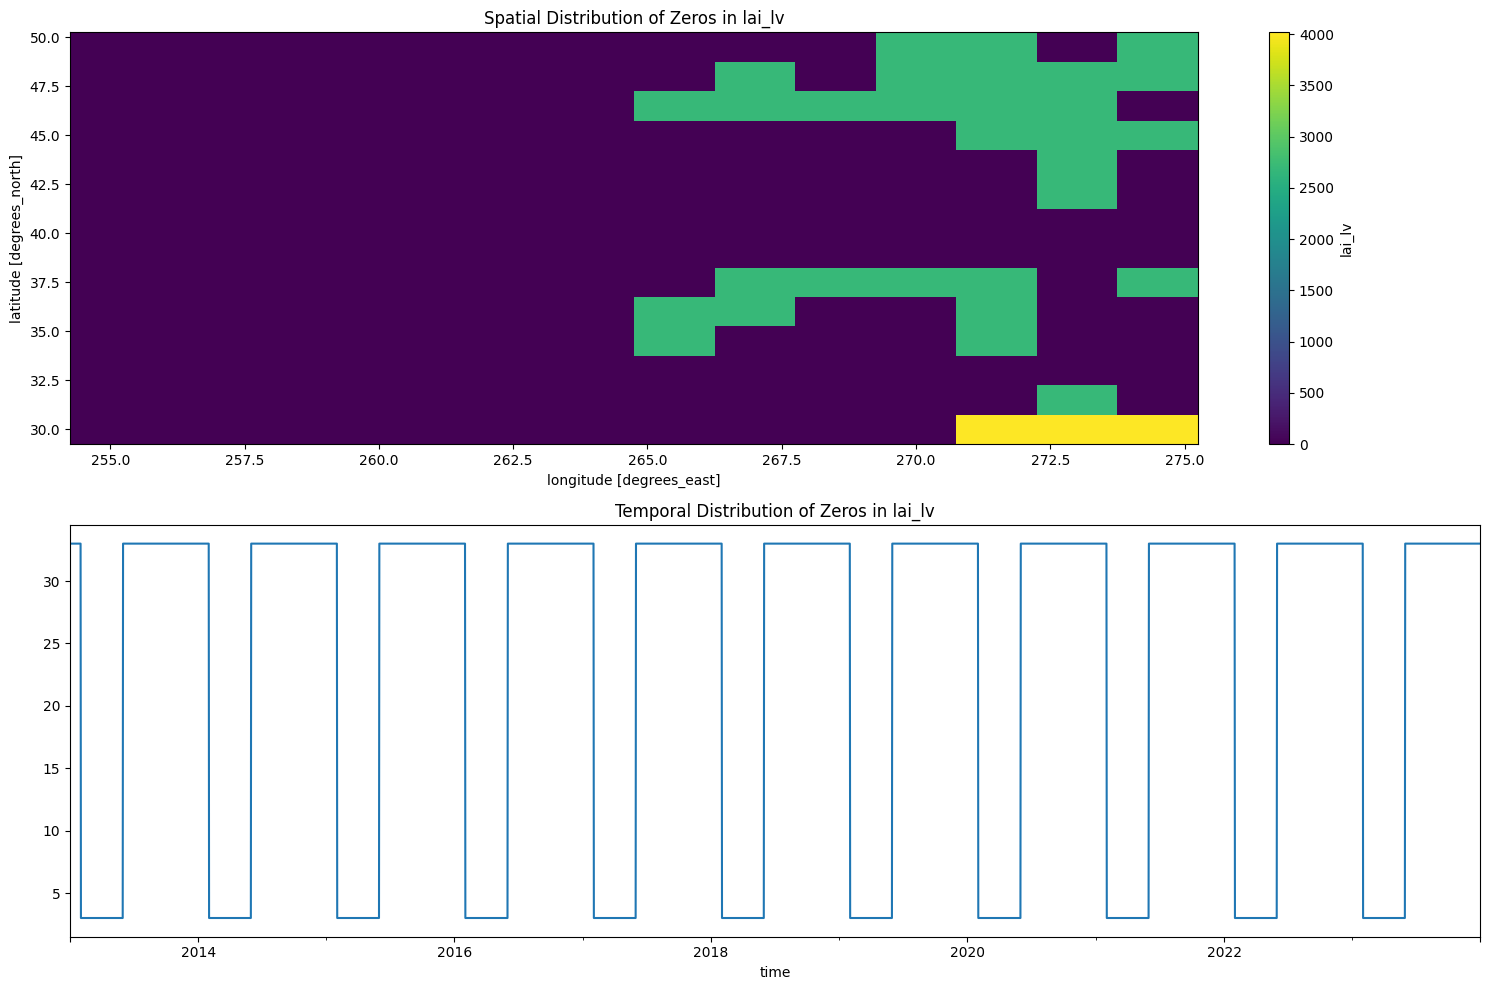

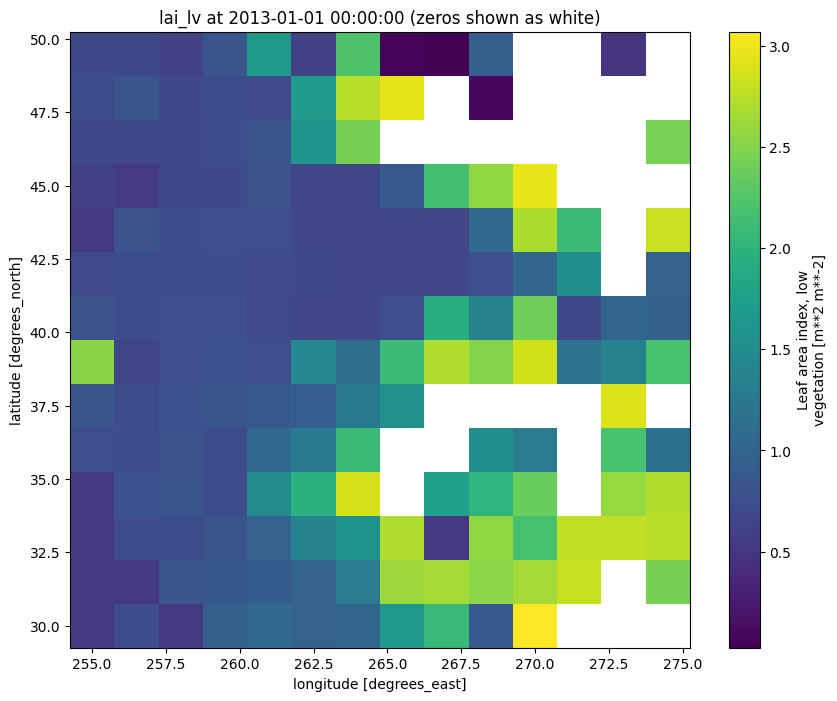

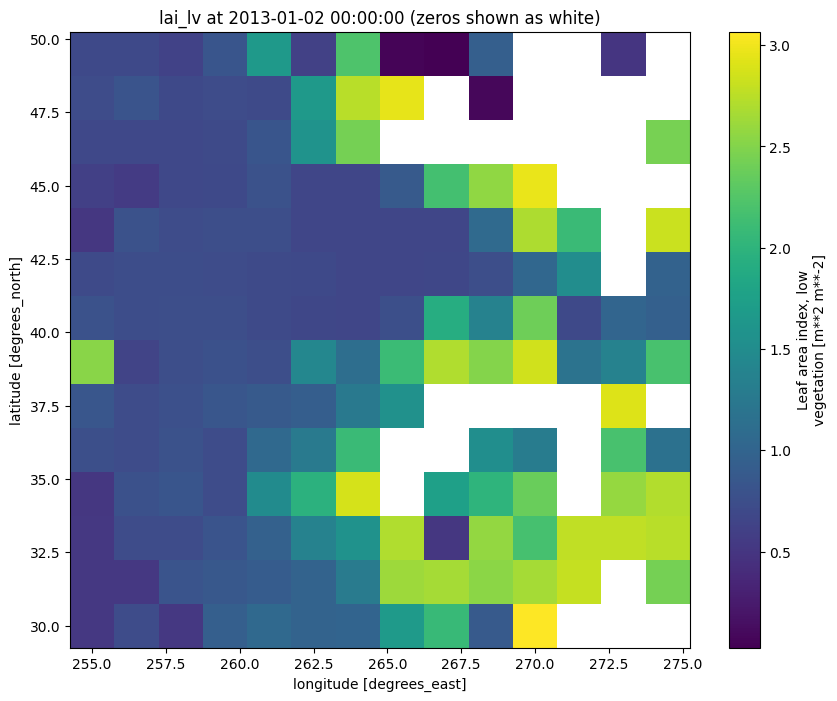


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 92901 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 310
Total filled: 92591 (99.67%)

Generating validation plots...


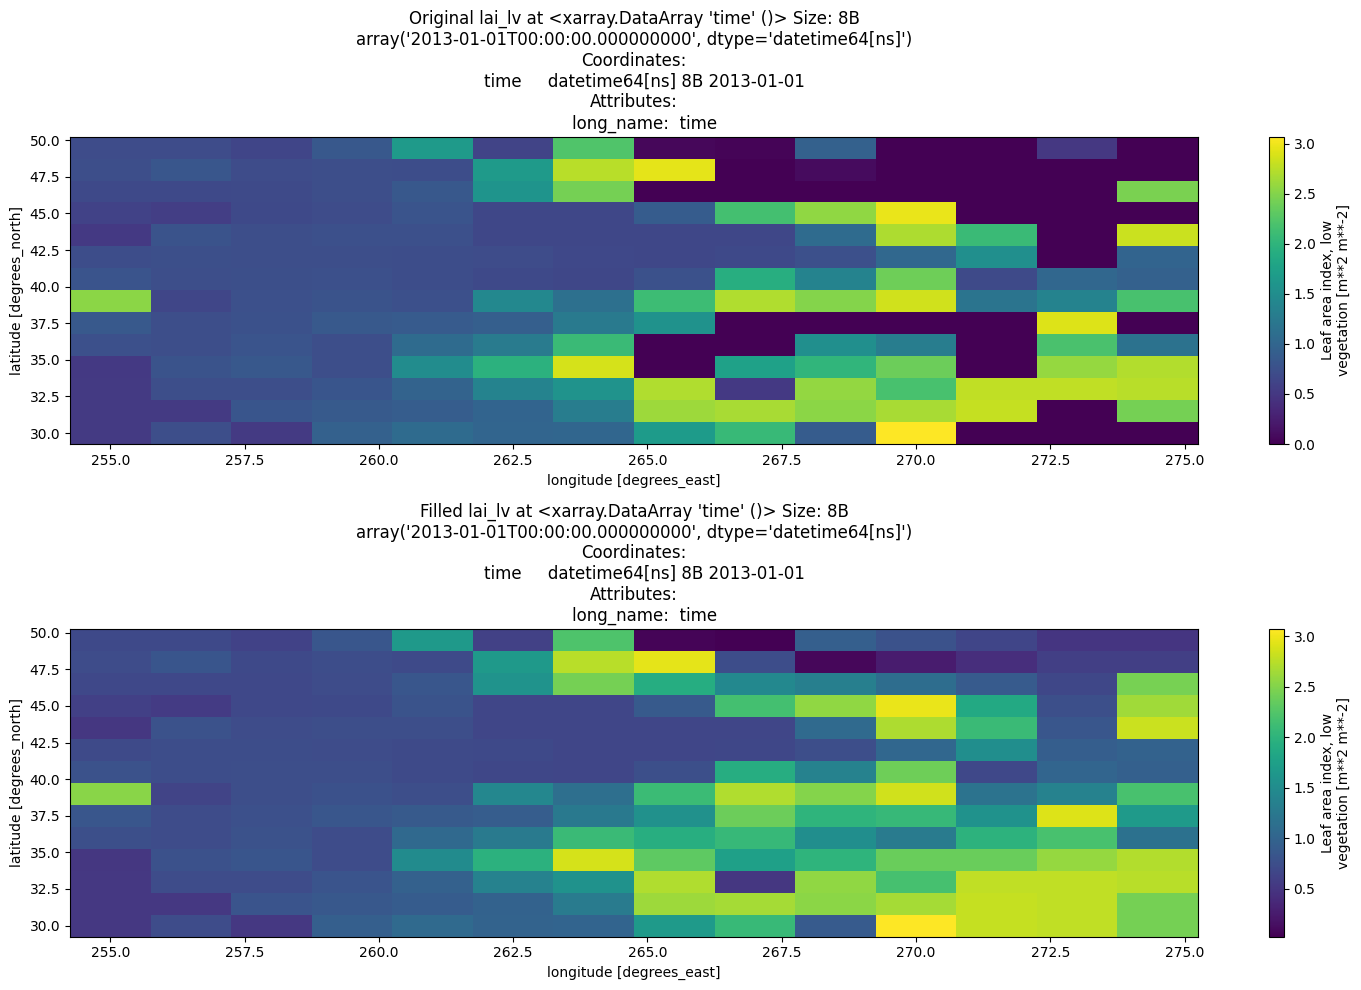

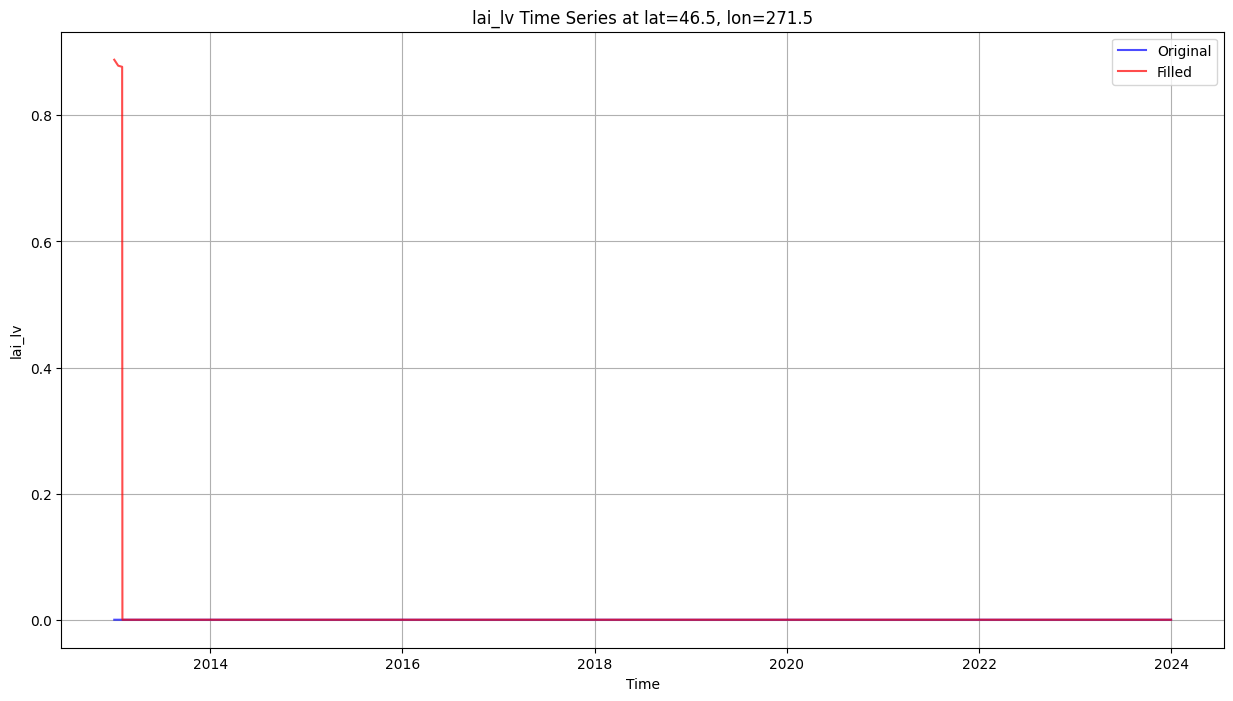


Processing completed in 148.0 seconds (2.5 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Processing variable 6/10: pev

Processing pev
Original zeros: 12051

===== Zero Analysis for pev =====
Total zeros: 12051
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


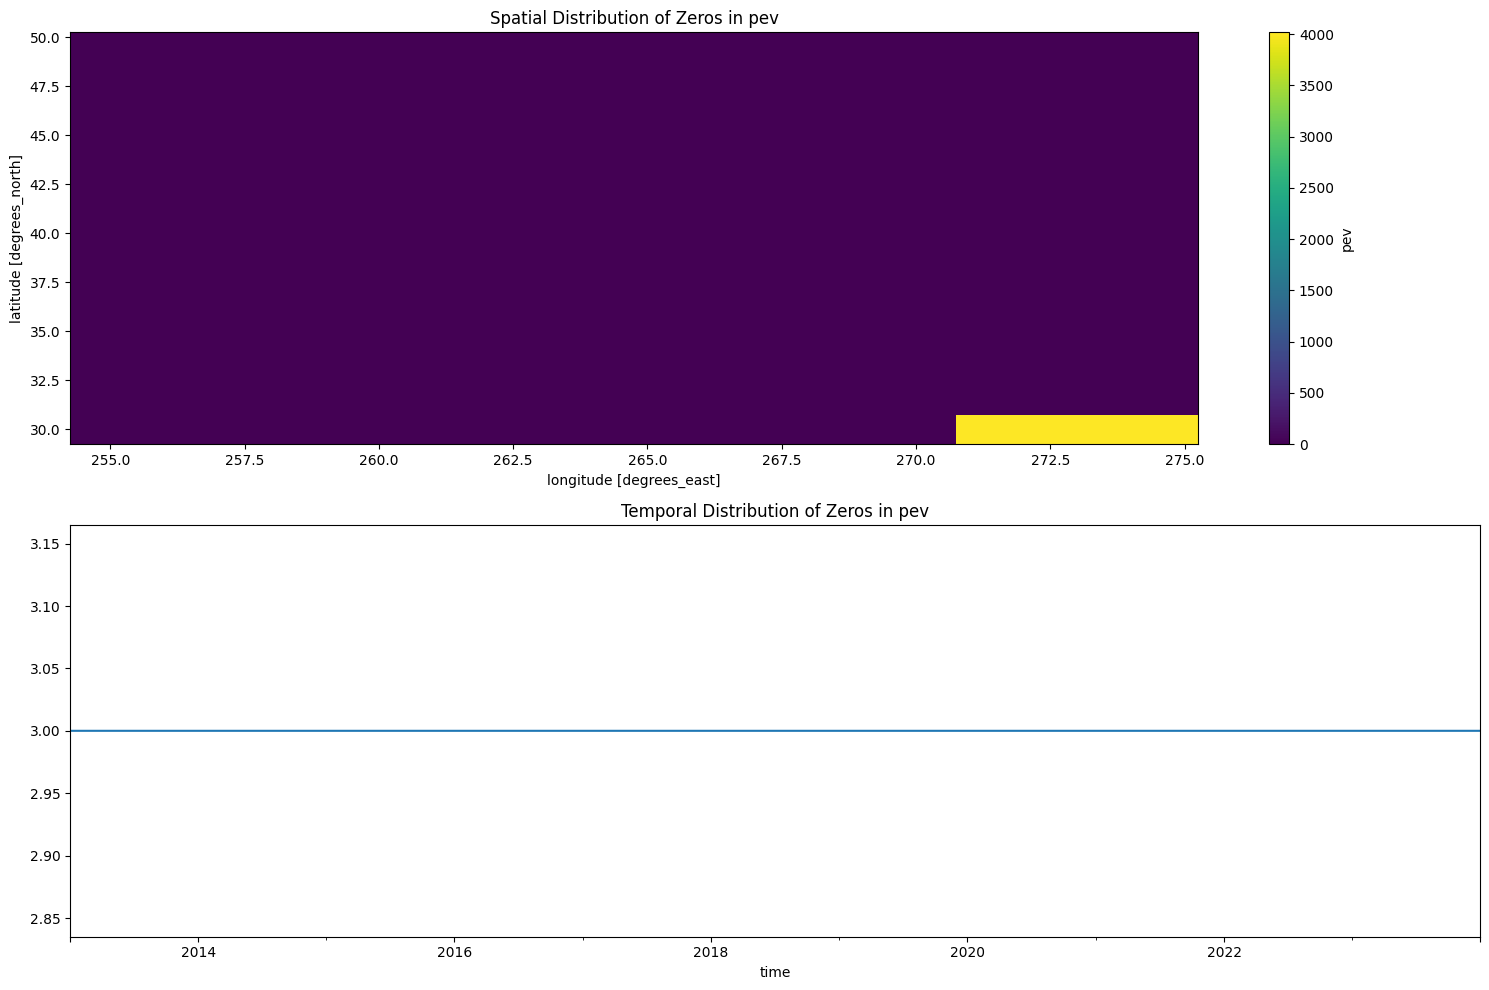

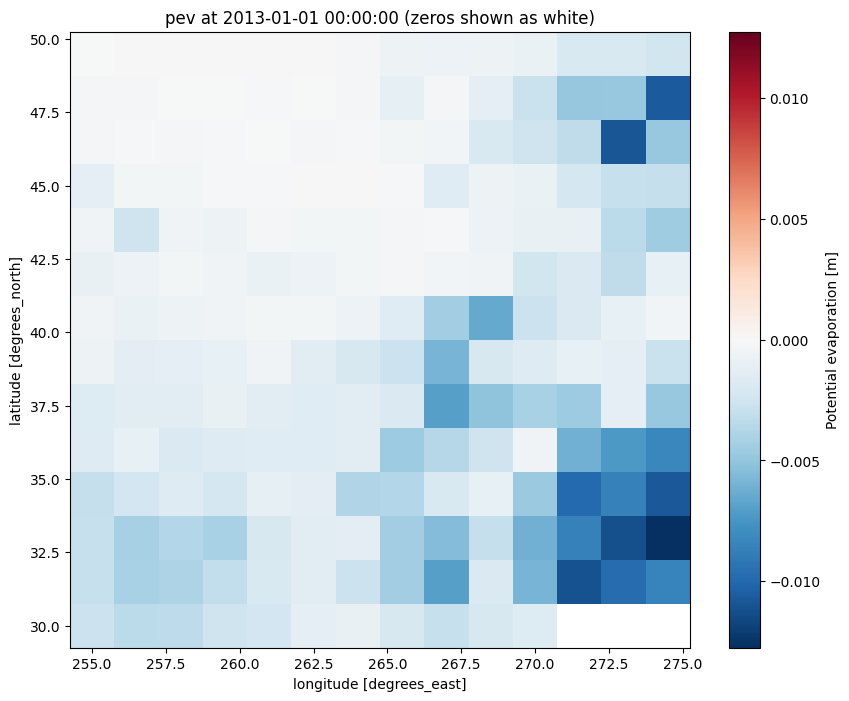

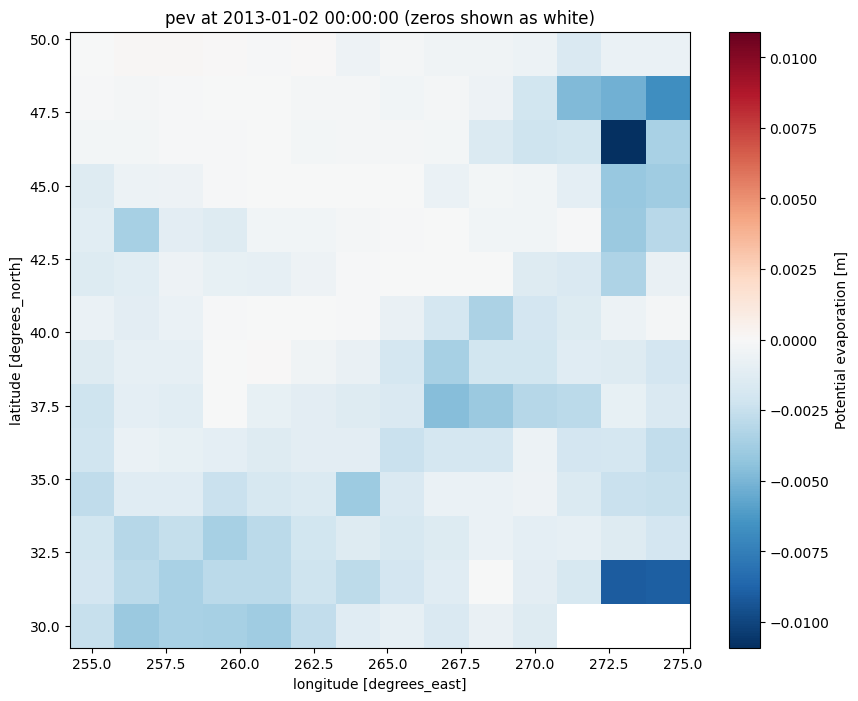


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 12051 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 12051 (100.00%)

Generating validation plots...


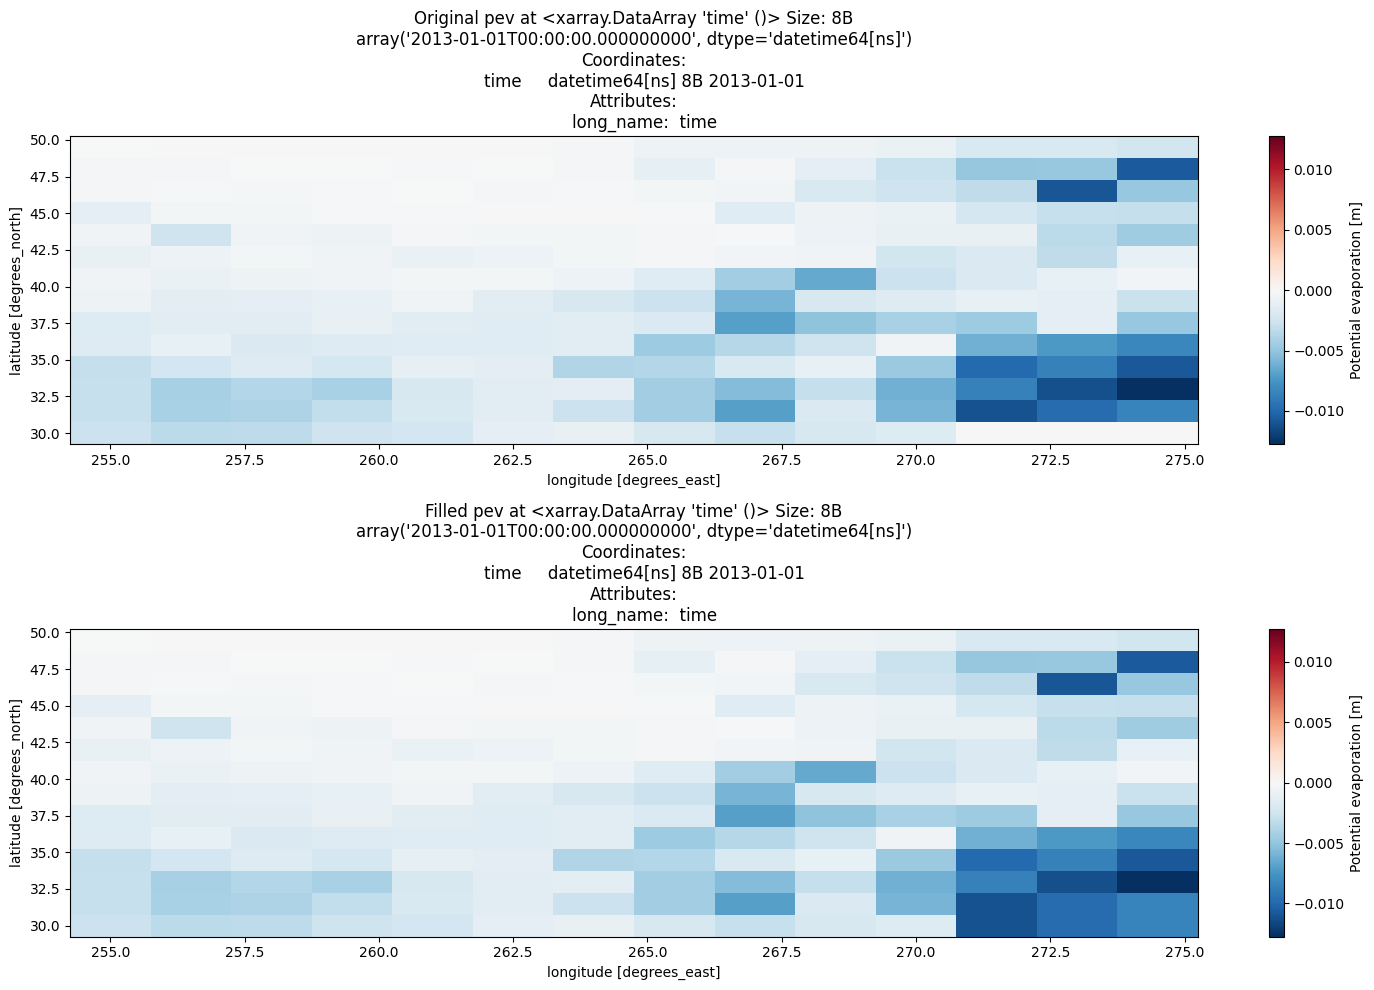

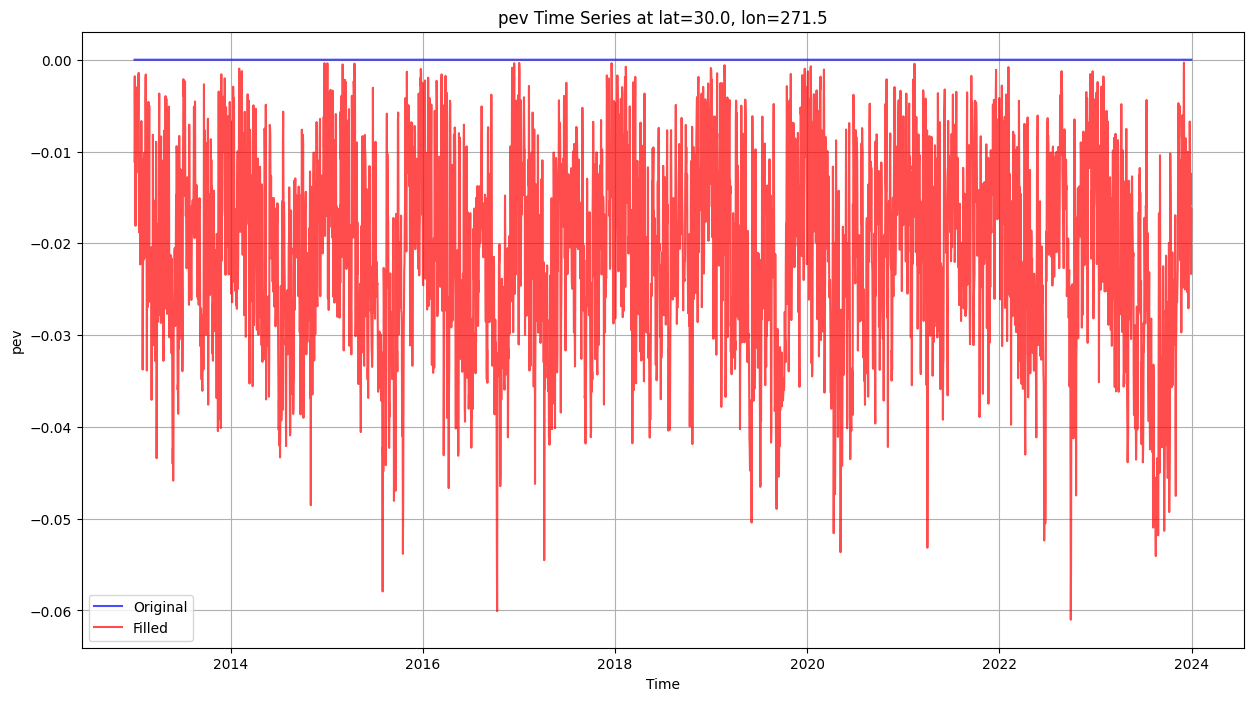


Processing completed in 155.3 seconds (2.6 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Processing variable 7/10: swvl2

Processing swvl2
Original zeros: 12051

===== Zero Analysis for swvl2 =====
Total zeros: 12051
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


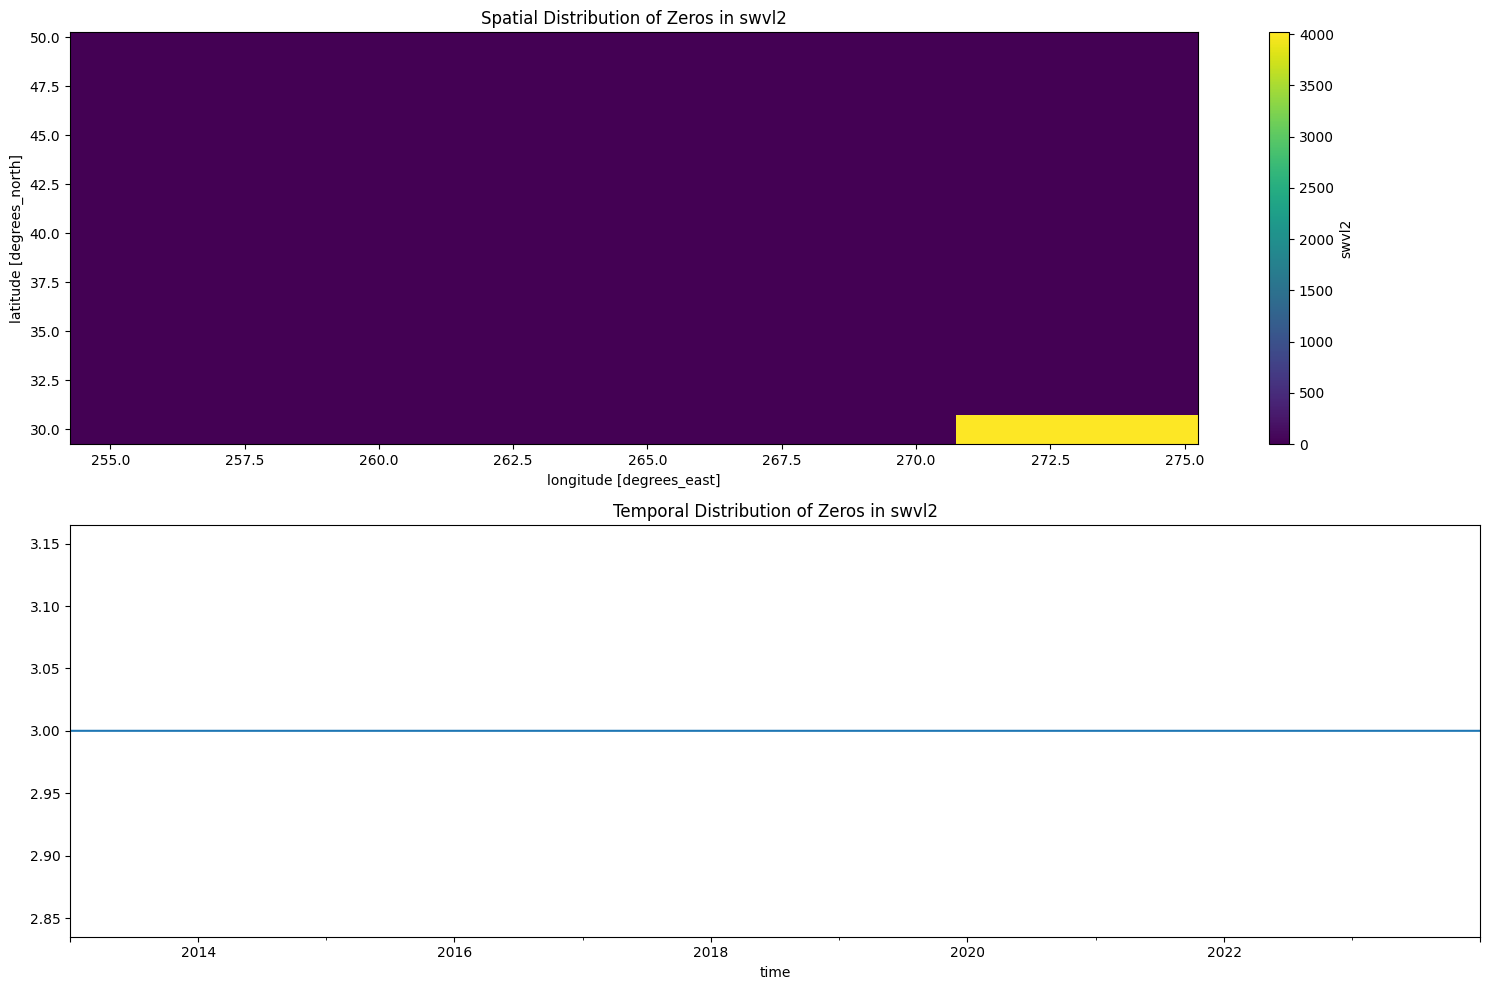

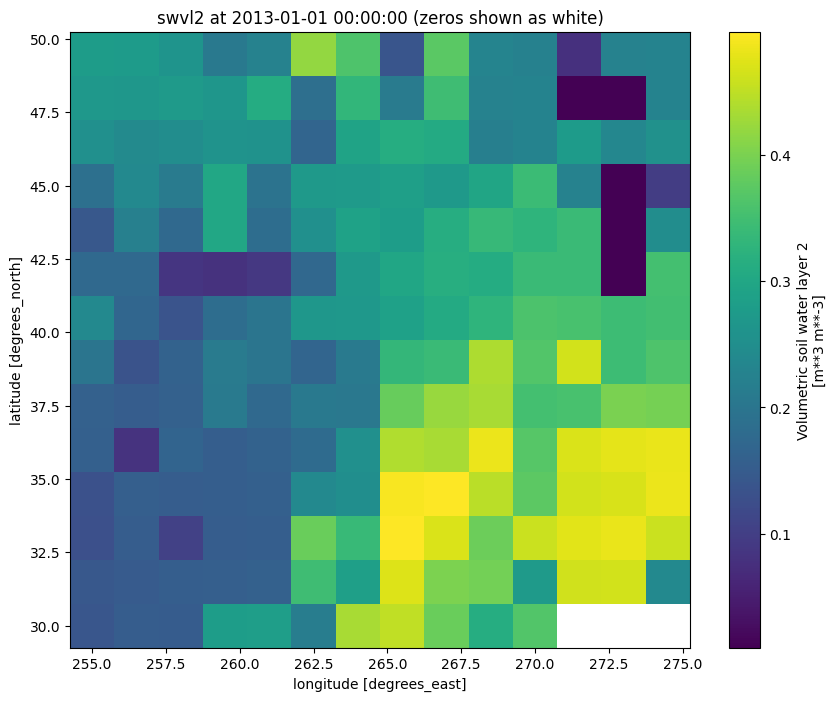

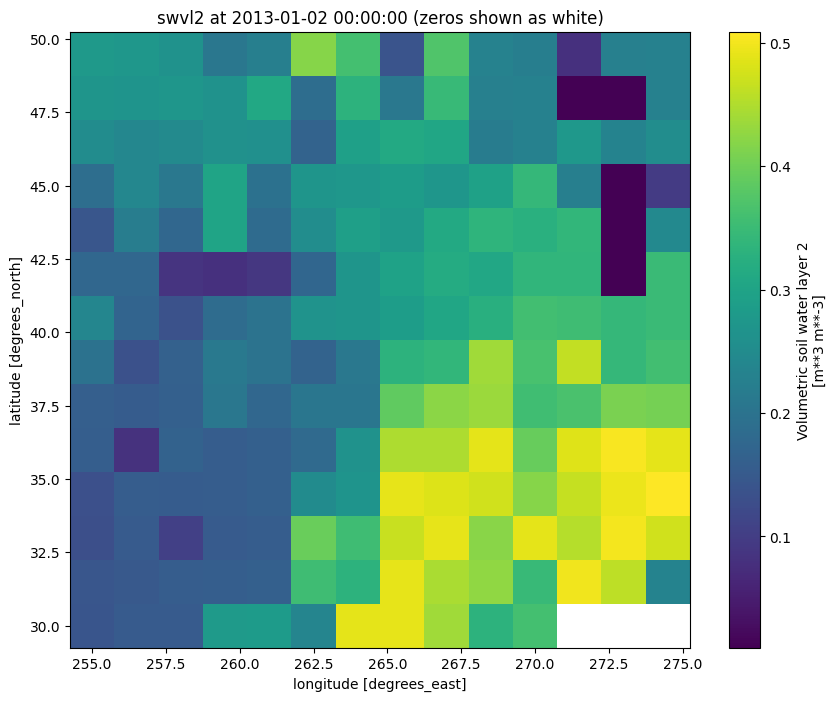


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 12051 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 12051 (100.00%)

Generating validation plots...


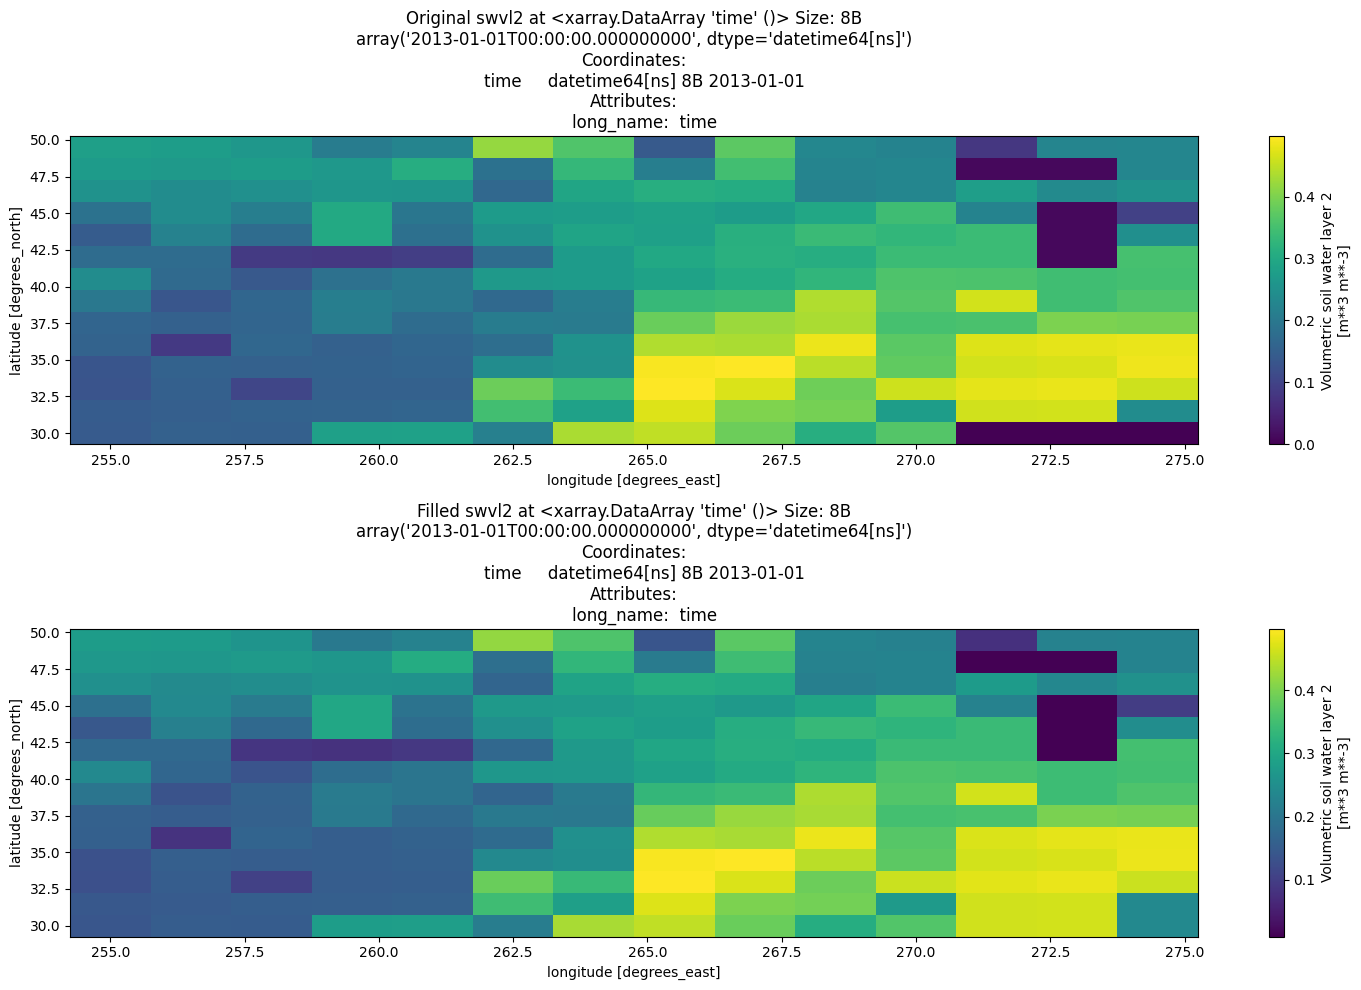

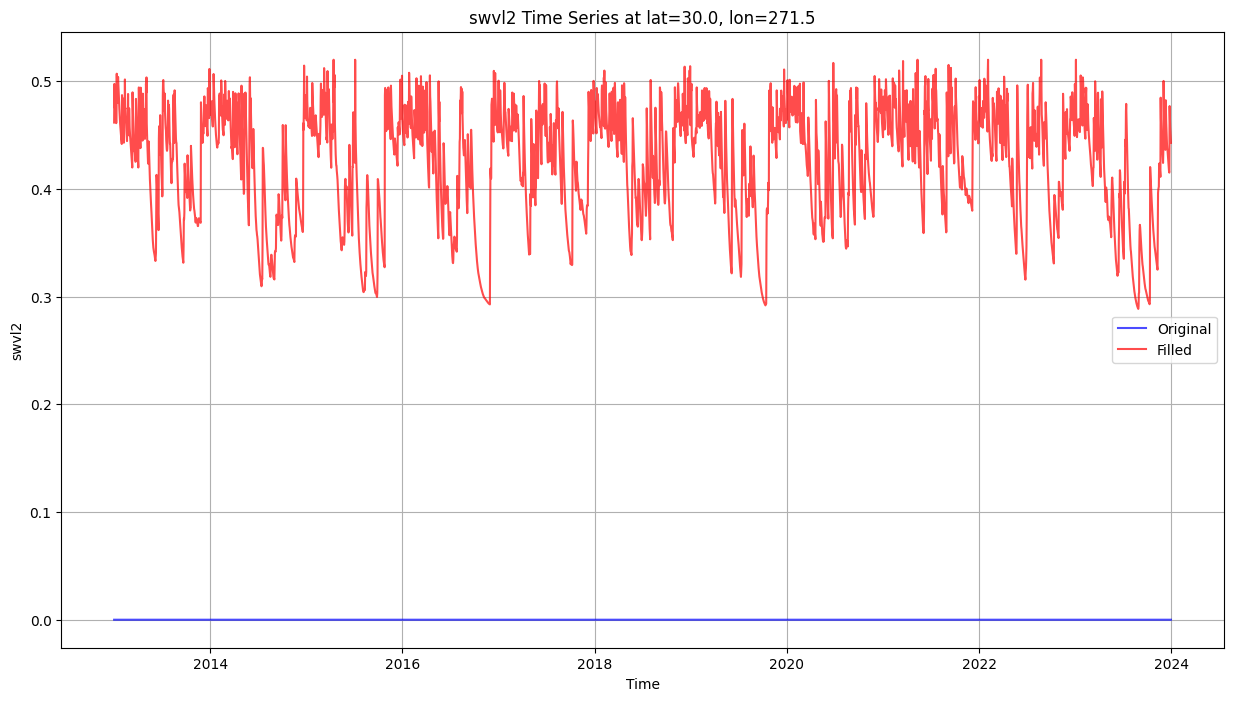


Processing completed in 164.8 seconds (2.7 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Processing variable 8/10: swvl3

Processing swvl3
Original zeros: 12051

===== Zero Analysis for swvl3 =====
Total zeros: 12051
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


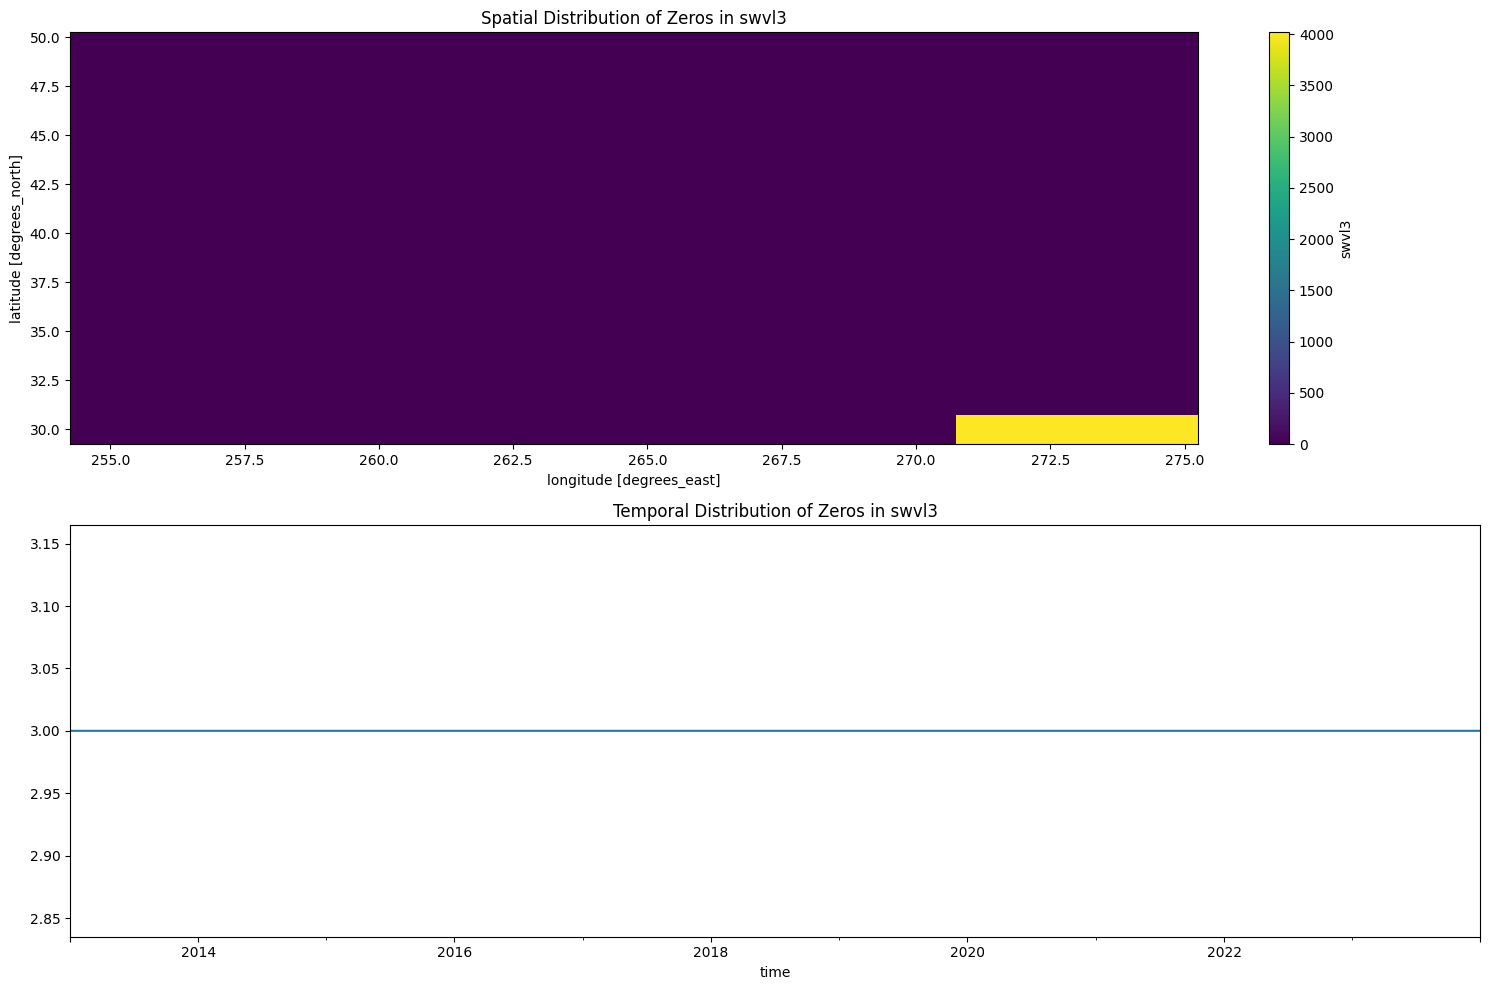

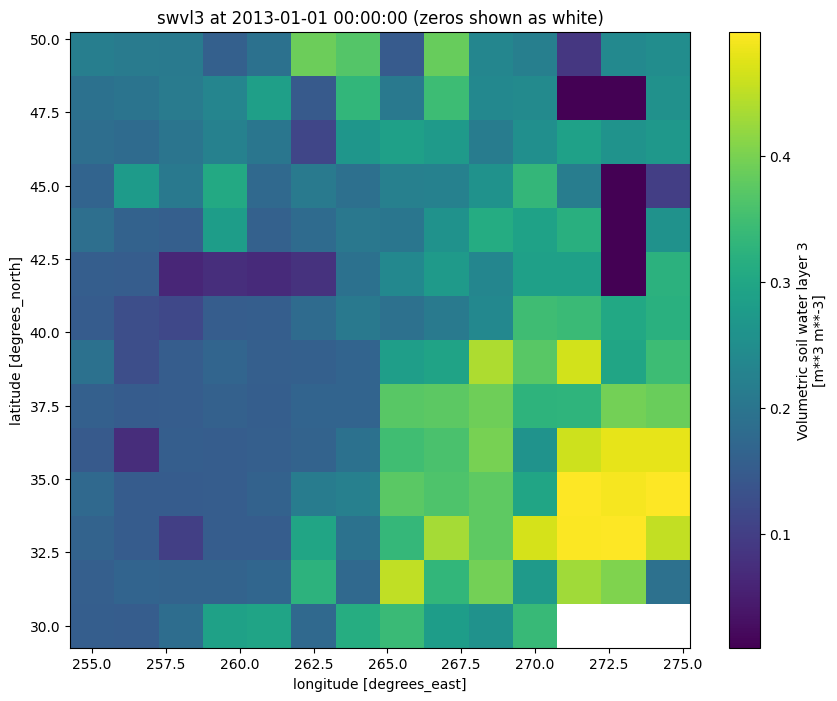

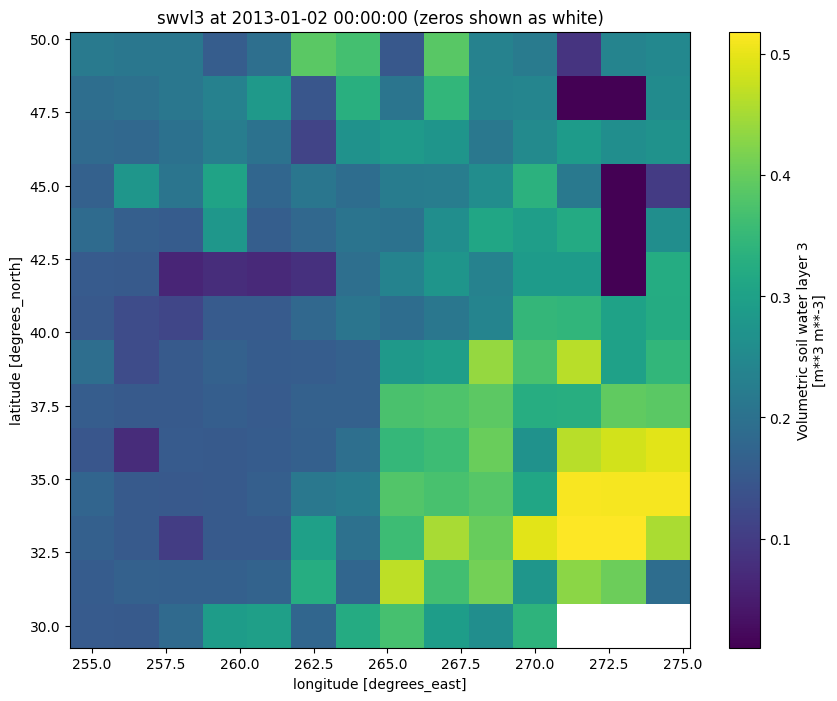


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 12051 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 12051 (100.00%)

Generating validation plots...


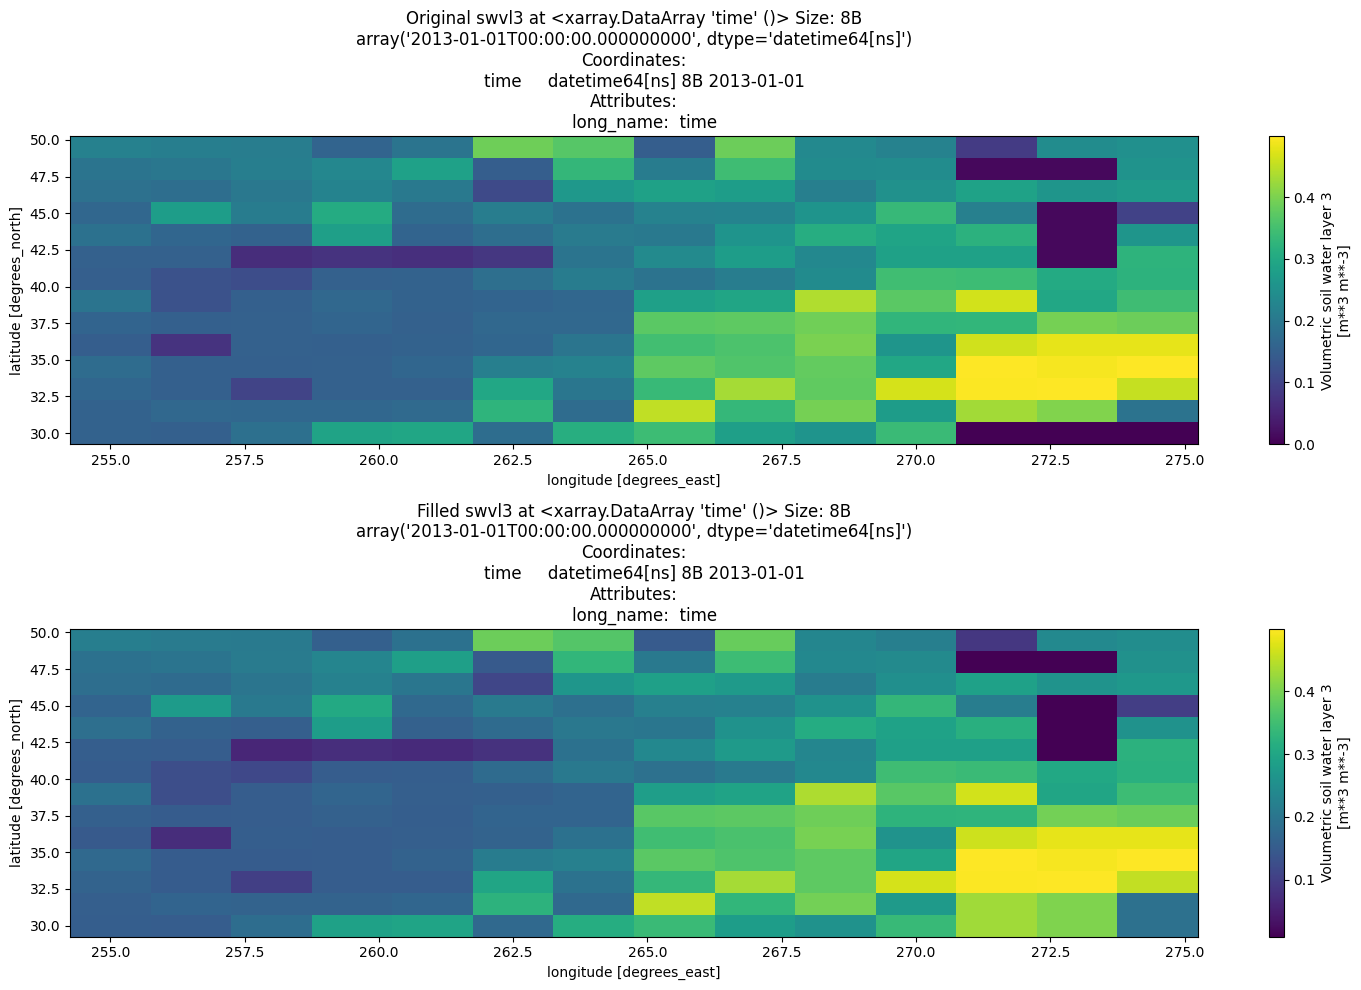

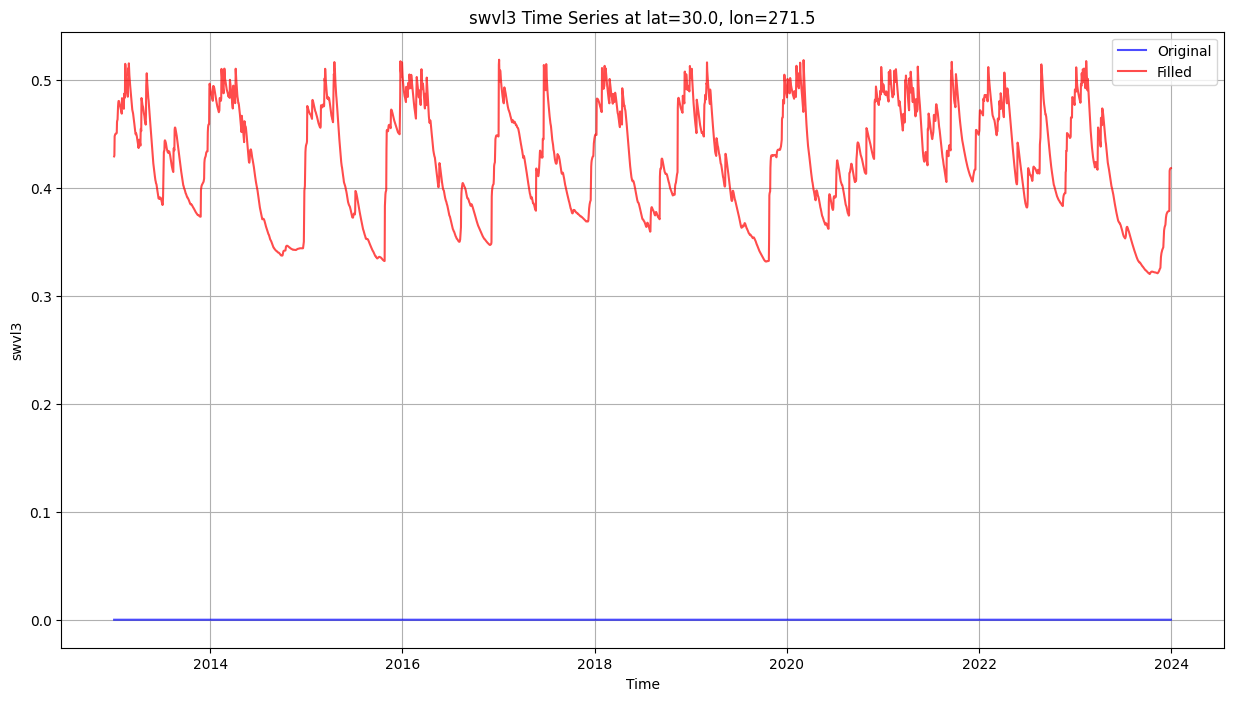


Processing completed in 179.9 seconds (3.0 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Skipping t2m (already processed)

Processing variable 10/10: tp

Processing tp
Original zeros: 172571

===== Zero Analysis for tp =====
Total zeros: 172571
Times with zeros: 4017 out of 4017
First time with zeros: 2013-01-01 00:00:00
Last time with zeros: 2023-12-31 00:00:00


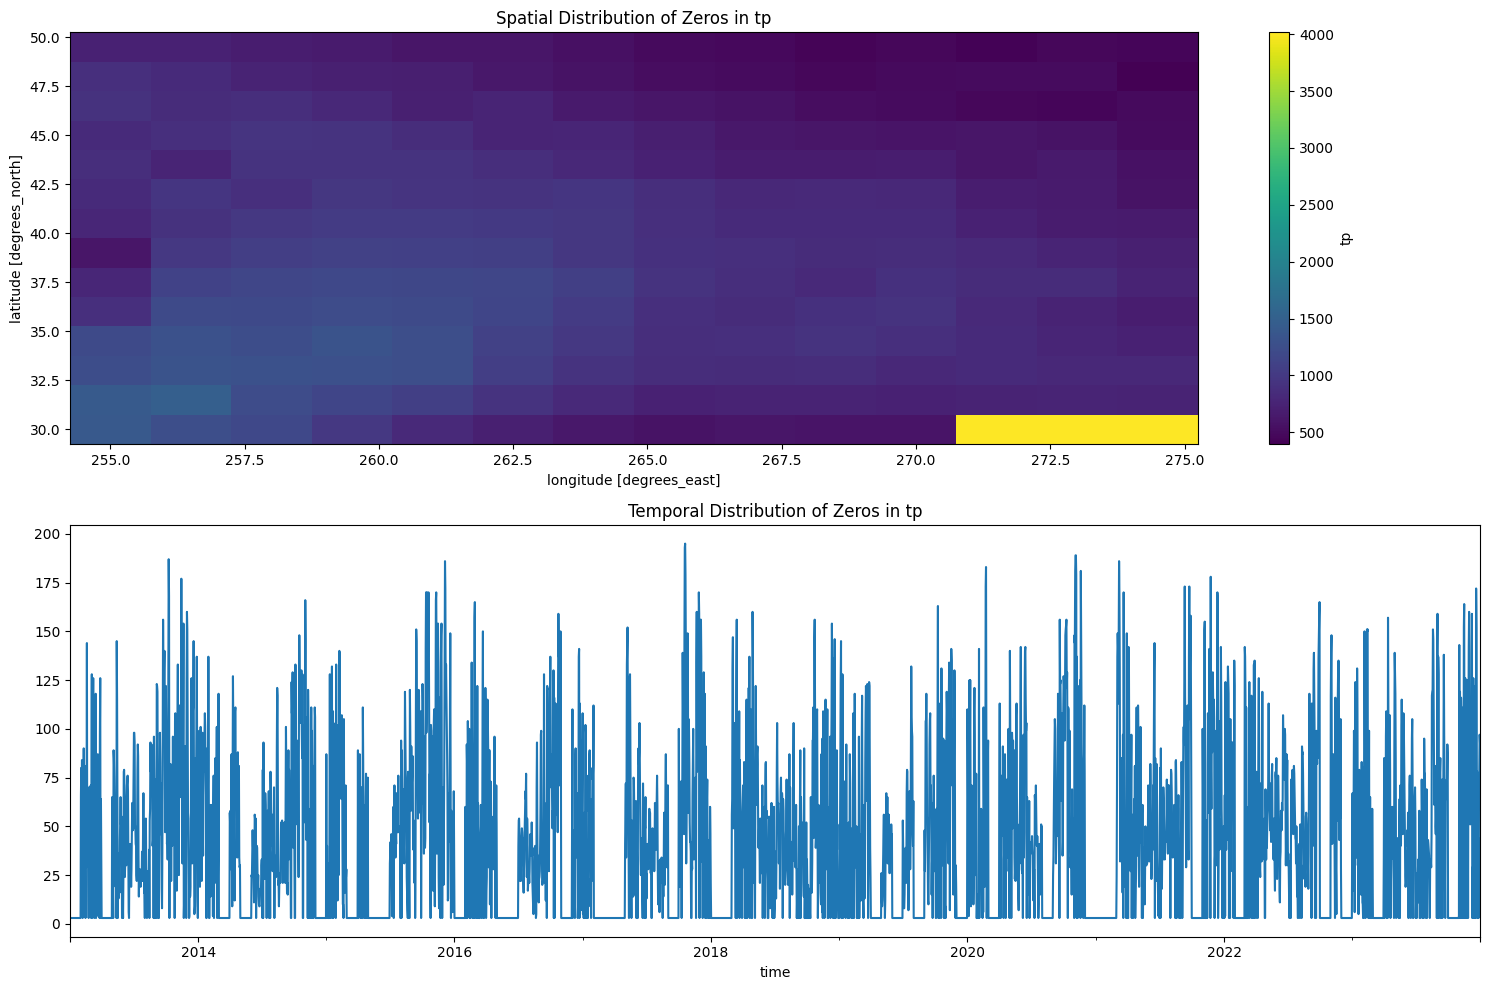

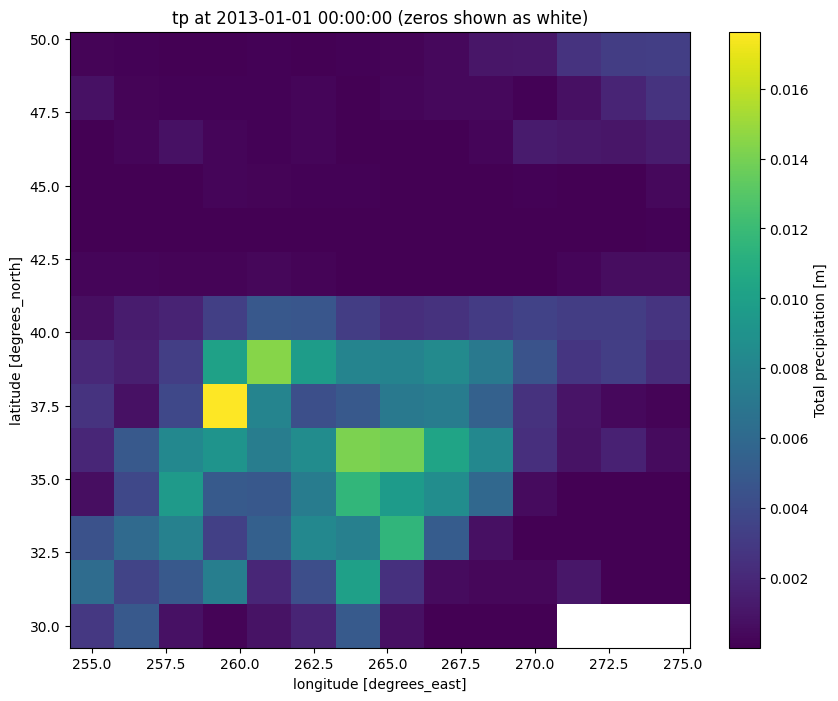

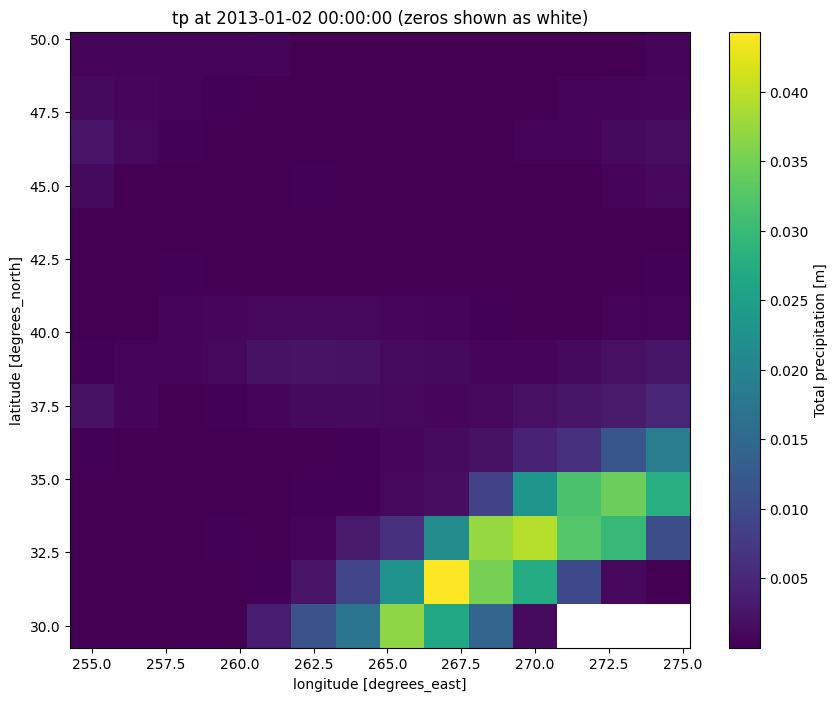


Step 1: Interpolating along each dimension...
Interpolating along time dimension...


Interpolating along time:   0%|          | 0/196 [00:00<?, ?it/s]

Interpolating along latitude dimension...


Interpolating along latitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Interpolating along longitude dimension...


Interpolating along longitude:   0%|          | 0/56238 [00:00<?, ?it/s]

Filled 172571 zeros (100.00%) with basic interpolation
Remaining missing values: 0

Final zeros remaining: 0
Total filled: 172571 (100.00%)

Generating validation plots...


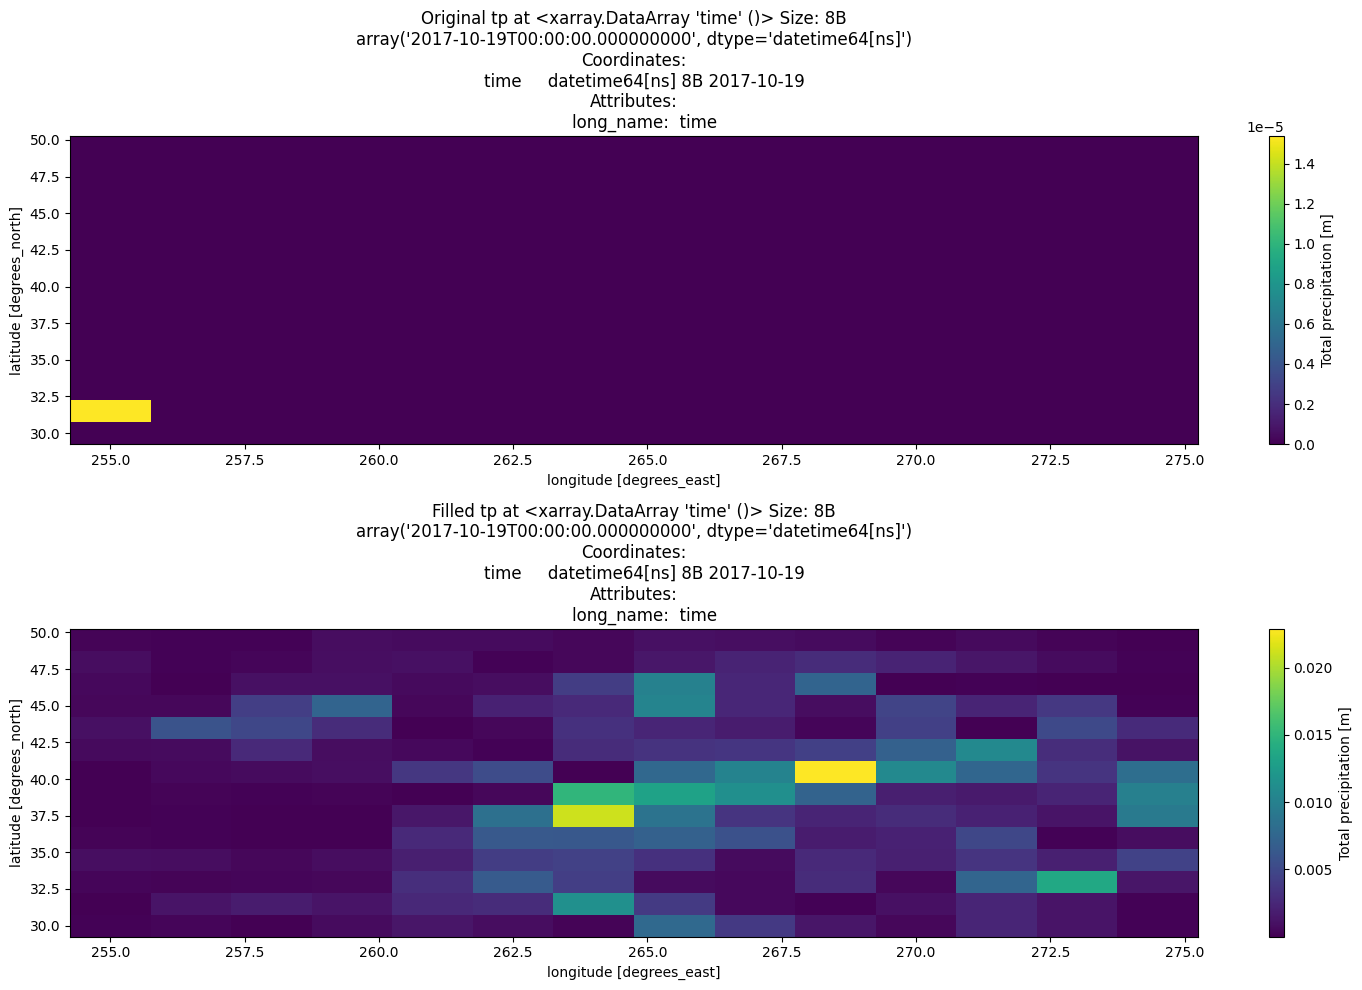

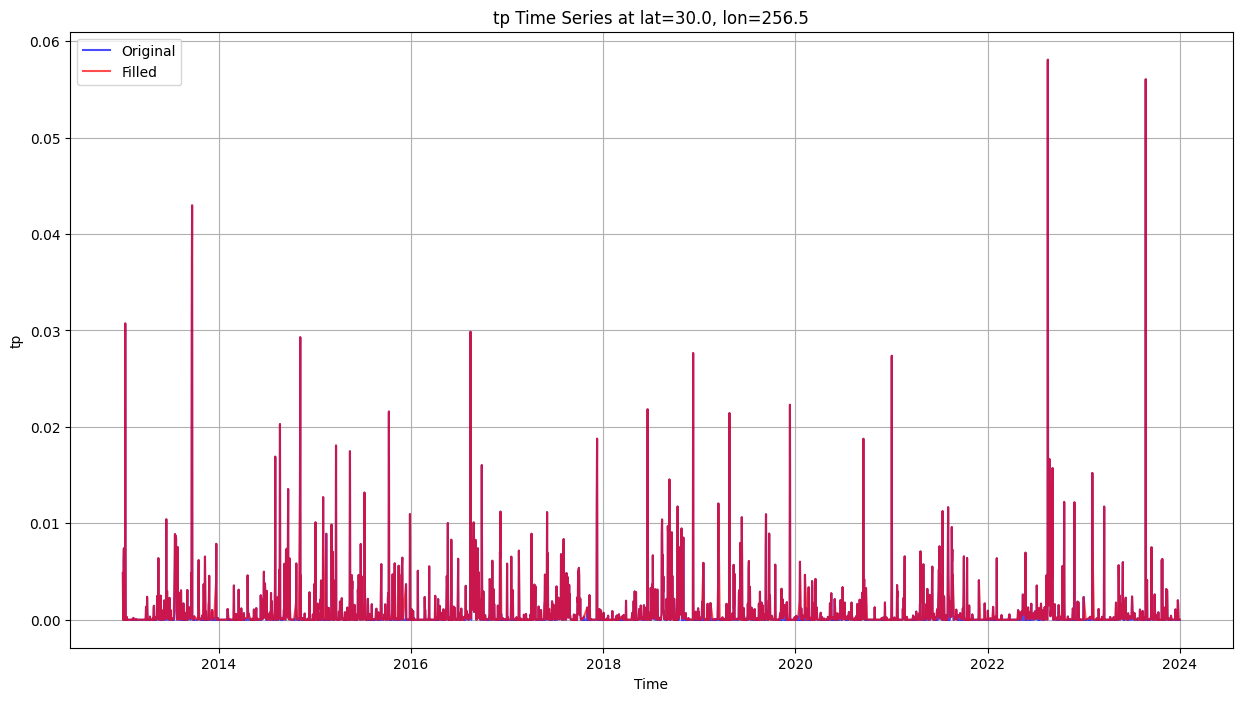


Processing completed in 171.1 seconds (2.9 minutes)
Saving interim results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_interim.nc

Saving final results to /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled.nc

All processing completed in 18.1 minutes
Done!


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator
from tqdm.notebook import tqdm
import time
import os

def analyze_zero_distribution(ds, variable):
    """
    Analyze the distribution of zeros in a variable to understand patterns.

    Parameters:
    -----------
    ds : xarray.Dataset
        The dataset containing the variable
    variable : str
        Name of the variable to analyze
    """
    # Get the variable data
    da = ds[variable]

    # Find zero values
    zero_mask = (da == 0)
    zero_count = zero_mask.sum().item()

    print(f"\n===== Zero Analysis for {variable} =====")
    print(f"Total zeros: {zero_count}")

    # Check if zeros are clustered in time
    time_zeros = zero_mask.sum(dim=['latitude', 'longitude']).to_pandas()
    times_with_zeros = time_zeros[time_zeros > 0].index

    print(f"Times with zeros: {len(times_with_zeros)} out of {len(da.time)}")
    if len(times_with_zeros) > 0:
        # Show first and last times with zeros
        print(f"First time with zeros: {times_with_zeros[0]}")
        print(f"Last time with zeros: {times_with_zeros[-1]}")

    # Check if zeros are clustered in space
    lat_zeros = zero_mask.sum(dim=['time', 'longitude'])
    lons_with_zeros = zero_mask.sum(dim=['time', 'latitude'])

    # Plot the spatial distribution of zeros
    plt.figure(figsize=(15, 10))

    # Create a 2D heatmap of zero counts across lat/lon
    zero_spatial = zero_mask.sum(dim='time')
    plt.subplot(2, 1, 1)
    zero_spatial.plot()
    plt.title(f'Spatial Distribution of Zeros in {variable}')

    # Plot time series of zero counts
    plt.subplot(2, 1, 2)
    time_zeros.plot()
    plt.title(f'Temporal Distribution of Zeros in {variable}')

    plt.tight_layout()
    plt.show()

    # Sample a few time slices with zeros to visualize patterns
    if len(times_with_zeros) > 0:
        sample_times = times_with_zeros[:min(2, len(times_with_zeros))]

        for t in sample_times:
            plt.figure(figsize=(10, 8))
            da.sel(time=t).where(da.sel(time=t) != 0).plot()
            plt.title(f'{variable} at {t} (zeros shown as white)')
            plt.show()

def interpolate_along_dimension(da, dimension, method='linear', max_gap=None):
    """
    Interpolate missing values along a specific dimension.

    Parameters:
    -----------
    da : xarray.DataArray
        The data array to interpolate
    dimension : str
        Dimension along which to interpolate ('time', 'latitude', 'longitude')
    method : str, default 'linear'
        Interpolation method
    max_gap : int, optional
        Maximum size of gap to fill

    Returns:
    --------
    xarray.DataArray
        Interpolated data array
    """
    # Make a copy to avoid modifying the original
    result = da.copy(deep=True)

    # Get the dimension coordinates
    dim_coords = result[dimension].values

    # Get the other dimensions
    other_dims = [dim for dim in result.dims if dim != dimension]
    if len(other_dims) == 2:
        dim1, dim2 = other_dims

        # Get coordinate values for the other dimensions
        coords1 = result[dim1].values
        coords2 = result[dim2].values

        # Track progress with tqdm
        with tqdm(total=len(coords1) * len(coords2), desc=f"Interpolating along {dimension}") as pbar:
            # Iterate over all combinations of the other dimensions
            for i, coord1 in enumerate(coords1):
                for j, coord2 in enumerate(coords2):
                    # Select the slice along the dimension
                    selector = {dim1: coord1, dim2: coord2}
                    slice_data = result.sel(**selector)

                    # Check if there are any NaNs to interpolate
                    if np.isnan(slice_data).any():
                        # Convert to pandas Series for interpolation
                        series = slice_data.to_pandas()

                        # Only interpolate if we have enough non-NaN values
                        if series.notna().sum() >= 2:
                            # Interpolate missing values
                            interpolated = series.interpolate(method=method, limit=max_gap)

                            # Update the result with interpolated values
                            result.loc[selector] = interpolated.values

                    pbar.update(1)

    return result

def fill_with_climatology(da, zero_mask=None):
    """
    Fill missing values with climatological values.

    Parameters:
    -----------
    da : xarray.DataArray
        The data array to fill
    zero_mask : xarray.DataArray, optional
        Boolean mask indicating zeros in the original data

    Returns:
    --------
    xarray.DataArray
        Data array with values filled using climatology
    """
    # Create a copy
    result = da.copy(deep=True)

    # If no mask is provided, create one
    if zero_mask is None:
        zero_mask = (da == 0)

    # Replace zeros with NaN temporarily
    data_with_nans = da.where(~zero_mask)

    # Add month coordinate for grouping
    data_with_month = data_with_nans.assign_coords(
        month=("time", [pd.Timestamp(t).month for t in data_with_nans.time.values])
    )

    # Calculate monthly climatology
    climatology = data_with_month.groupby("month").mean(skipna=True)

    # Fill missing values with climatology
    for month in range(1, 13):
        # Get times for this month
        month_mask = np.array([pd.Timestamp(t).month == month for t in result.time.values])
        if not any(month_mask):
            continue

        # Get climatology for this month
        month_clim = climatology.sel(month=month)

        # Create a broadcaster for this month's times
        time_broadcaster = xr.broadcast(result.isel(time=month_mask), month_clim)[0]

        # Replace NaNs with climatology for this month
        for i, t in enumerate(result.time.values[month_mask]):
            # Get mask for this time
            t_mask = zero_mask.sel(time=t)

            if not t_mask.any():
                continue

            # Fill zeros with climatology
            result.loc[dict(time=t)] = xr.where(t_mask, month_clim, result.sel(time=t))

    return result

def apply_weighted_neighbor_interpolation(da, zero_mask=None, max_dist=3):
    """
    Fill missing values using weighted nearest neighbor interpolation.

    Parameters:
    -----------
    da : xarray.DataArray
        The data array to fill
    zero_mask : xarray.DataArray, optional
        Boolean mask indicating zeros in the original data
    max_dist : int, default 3
        Maximum distance to consider for neighbors

    Returns:
    --------
    xarray.DataArray
        Data array with values filled using nearest neighbors
    """
    # Create a copy
    result = da.copy(deep=True)

    # If no mask is provided, create one
    if zero_mask is None:
        zero_mask = (da == 0)

    # Create array with NaNs at zero locations
    data_with_nans = da.where(~zero_mask)

    # Get dimensions
    time_dim = len(da.time)
    lat_dim = len(da.latitude)
    lon_dim = len(da.longitude)

    # Define weights for different dimensions
    # For climate data, we typically want to weigh time more than space
    time_weight = 1.0
    lat_weight = 0.5
    lon_weight = 0.5

    # Find indices of missing values
    missing_mask = np.isnan(data_with_nans)
    if not missing_mask.any():
        return result

    missing_indices = np.where(missing_mask)

    # Process in batches to show progress
    batch_size = 5000
    num_batches = int(np.ceil(len(missing_indices[0]) / batch_size))

    filled_count = 0

    for batch in tqdm(range(num_batches), desc="Filling with weighted neighbors"):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, len(missing_indices[0]))

        for i in range(start_idx, end_idx):
            t_idx, lat_idx, lon_idx = missing_indices[0][i], missing_indices[1][i], missing_indices[2][i]

            # Define search area bounds
            t_min = max(0, t_idx - max_dist)
            t_max = min(time_dim - 1, t_idx + max_dist)
            lat_min = max(0, lat_idx - max_dist)
            lat_max = min(lat_dim - 1, lat_idx + max_dist)
            lon_min = max(0, lon_idx - max_dist)
            lon_max = min(lon_dim - 1, lon_idx + max_dist)

            # Extract data for the search area
            search_area = data_with_nans.isel(
                time=slice(t_min, t_max + 1),
                latitude=slice(lat_min, lat_max + 1),
                longitude=slice(lon_min, lon_max + 1)
            )

            # Find valid values in the search area
            valid_mask = ~np.isnan(search_area)
            if not valid_mask.any():
                continue

            # Get indices of valid values
            valid_indices = np.where(valid_mask)

            # Adjust indices to the global coordinate system
            valid_t = valid_indices[0] + t_min
            valid_lat = valid_indices[1] + lat_min
            valid_lon = valid_indices[2] + lon_min

            # Calculate weighted distances
            distances = np.sqrt(
                time_weight * (valid_t - t_idx)**2 +
                lat_weight * (valid_lat - lat_idx)**2 +
                lon_weight * (valid_lon - lon_idx)**2
            )

            # Get values at valid points
            valid_values = search_area.values[valid_indices]

            # Apply inverse distance weighting
            weights = 1.0 / (distances + 1e-10)
            weighted_sum = np.sum(valid_values * weights)
            weight_sum = np.sum(weights)

            # Update result with weighted average
            result.values[t_idx, lat_idx, lon_idx] = weighted_sum / weight_sum
            filled_count += 1

    print(f"Filled {filled_count} values using weighted neighbor interpolation")
    return result

def process_variable(ds, variable, output_dir=None, plot_results=True):
    """
    Process a single variable with a comprehensive filling strategy.

    Parameters:
    -----------
    ds : xarray.Dataset
        The dataset containing the variable
    variable : str
        Name of the variable to process
    output_dir : str, optional
        Directory to save plots and interim results
    plot_results : bool, default True
        Whether to generate diagnostic plots

    Returns:
    --------
    xarray.DataArray
        Processed variable with zeros filled
    """
    print(f"\n{'='*50}")
    print(f"Processing {variable}")
    print(f"{'='*50}")

    # Create output directory if needed
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Start timing
    start_time = time.time()

    # Get original data and create zero mask
    original_da = ds[variable]
    zero_mask = (original_da == 0)
    zero_count = zero_mask.sum().item()

    print(f"Original zeros: {zero_count}")

    # Skip if no zeros
    if zero_count == 0:
        print(f"No zeros to fill in {variable}. Skipping.")
        return original_da

    # Step 1: Analyze zero distribution if plotting is enabled
    if plot_results:
        analyze_zero_distribution(ds, variable)

    # Create a working copy with zeros replaced by NaN
    working_da = original_da.where(~zero_mask)

    # Step 2: Interpolate along each dimension
    print("\nStep 1: Interpolating along each dimension...")

    # Interpolate along time
    print("Interpolating along time dimension...")
    time_interp = interpolate_along_dimension(working_da, 'time')

    # Interpolate along latitude
    print("Interpolating along latitude dimension...")
    lat_interp = interpolate_along_dimension(time_interp, 'latitude')

    # Interpolate along longitude
    print("Interpolating along longitude dimension...")
    lon_interp = interpolate_along_dimension(lat_interp, 'longitude')

    # Check progress
    missing_after_interp = np.isnan(lon_interp).sum().item()
    filled_by_interp = zero_count - missing_after_interp
    print(f"Filled {filled_by_interp} zeros ({filled_by_interp/zero_count*100:.2f}%) with basic interpolation")
    print(f"Remaining missing values: {missing_after_interp}")

    # Initialize variable for next step
    clim_filled = lon_interp
    missing_after_clim = missing_after_interp  # <-- This fixes the bug!

    # Step 3: Fill with climatology
    if missing_after_interp > 0:
        print("\nStep 2: Filling remaining values with climatology...")
        clim_filled = fill_with_climatology(lon_interp, zero_mask)

        # Check progress
        missing_after_clim = np.isnan(clim_filled).sum().item()
        filled_by_clim = missing_after_interp - missing_after_clim
        print(f"Filled {filled_by_clim} values ({filled_by_clim/zero_count*100:.2f}%) with climatology")
        print(f"Remaining missing values: {missing_after_clim}")

    # Step 4: Fill remaining with weighted neighbors
    if missing_after_clim > 0:
        print("\nStep 3: Filling remaining values with weighted neighbors...")
        final_da = apply_weighted_neighbor_interpolation(clim_filled, zero_mask)

        # Check final results
        missing_final = np.isnan(final_da).sum().item()
        filled_by_neighbors = missing_after_clim - missing_final
        print(f"Filled {filled_by_neighbors} values ({filled_by_neighbors/zero_count*100:.2f}%) with weighted neighbors")
        print(f"Remaining missing values: {missing_final}")
    else:
        final_da = clim_filled

    # Final check for any remaining NaNs - replace with original zeros if any remain
    if np.isnan(final_da).any():
        print("Replacing any remaining NaNs with original values...")
        final_da = xr.where(np.isnan(final_da), original_da, final_da)

    # Final count
    final_zeros = (final_da == 0).sum().item()
    print(f"\nFinal zeros remaining: {final_zeros}")
    print(f"Total filled: {zero_count - final_zeros} ({(zero_count - final_zeros)/zero_count*100:.2f}%)")

    # Plot results if requested
    if plot_results:
        print("\nGenerating validation plots...")

        # Sample a time point with zeros in the original data
        time_with_zeros = zero_mask.sum(dim=['latitude', 'longitude']).argmax('time').item()
        time_index = ds.time[time_with_zeros]

        # Plot spatial comparison
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 1, 1)
        original_da.sel(time=time_index).plot()
        plt.title(f'Original {variable} at {time_index}')

        plt.subplot(2, 1, 2)
        final_da.sel(time=time_index).plot()
        plt.title(f'Filled {variable} at {time_index}')

        plt.tight_layout()

        if output_dir:
            plt.savefig(os.path.join(output_dir, f"{variable}_spatial_comparison.png"))
        plt.show()

        # Find a lat/lon point with zeros
        lat_zeros = zero_mask.sum(dim=['time', 'longitude'])
        lon_zeros = zero_mask.sum(dim=['time', 'latitude'])

        if lat_zeros.max().item() > 0 and lon_zeros.max().item() > 0:
            lat_index = lat_zeros.argmax('latitude').item()
            lon_index = lon_zeros.argmax('longitude').item()

            lat_val = ds.latitude[lat_index].item()
            lon_val = ds.longitude[lon_index].item()

            # Plot time series comparison
            plt.figure(figsize=(15, 8))

            original_series = original_da.sel(latitude=lat_val, longitude=lon_val)
            filled_series = final_da.sel(latitude=lat_val, longitude=lon_val)

            plt.plot(original_da.time, original_series, 'b-', label='Original', alpha=0.7)
            plt.plot(final_da.time, filled_series, 'r-', label='Filled', alpha=0.7)

            plt.title(f'{variable} Time Series at lat={lat_val}, lon={lon_val}')
            plt.xlabel('Time')
            plt.ylabel(variable)
            plt.legend()
            plt.grid(True)

            if output_dir:
                plt.savefig(os.path.join(output_dir, f"{variable}_time_series_comparison.png"))
            plt.show()

    # Report timing
    elapsed = time.time() - start_time
    print(f"\nProcessing completed in {elapsed:.1f} seconds ({elapsed/60:.1f} minutes)")

    return final_da

def process_all_variables(ds, variables, output_dir, save_interim=True, plot_results=True, skip_existing=True):
    """
    Process all specified variables in a dataset.

    Parameters:
    -----------
    ds : xarray.Dataset
        The dataset containing the variables
    variables : list of str
        Names of variables to process
    output_dir : str
        Directory to save outputs
    save_interim : bool, default True
        Whether to save interim results after each variable
    plot_results : bool, default True
        Whether to generate diagnostic plots
    skip_existing : bool, default True
        Whether to skip variables that already exist in the interim file

    Returns:
    --------
    xarray.Dataset
        Dataset with all variables processed
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Get base filename for outputs
    base_filename = os.path.basename(getattr(ds, 'encoding', {}).get('source', 'dataset'))
    if not base_filename.endswith('.nc'):
        base_filename = 'dataset.nc'
    output_basename = os.path.splitext(base_filename)[0]

    # Define output file paths
    final_output = os.path.join(output_dir, f"{output_basename}_filled.nc")
    interim_output = os.path.join(output_dir, f"{output_basename}_interim.nc")

    # Check if interim file exists
    ds_filled = None
    if skip_existing and os.path.exists(interim_output):
        print(f"Loading existing interim results from {interim_output}")
        ds_filled = xr.open_dataset(interim_output)

        # Check which variables have been processed
        processed_vars = []
        for var in variables:
            if var in ds_filled and not (ds_filled[var] == 0).any():
                processed_vars.append(var)

        if processed_vars:
            print(f"Already processed variables: {processed_vars}")

    # If no interim results or not skipping, start with copy of original
    if ds_filled is None:
        print("Starting with fresh copy of dataset")
        ds_filled = ds.copy(deep=True)

    # Start timing
    start_time = time.time()

    # Process each variable
    for i, variable in enumerate(variables):
        # Skip if already processed
        if skip_existing and os.path.exists(interim_output):
            if variable in ds_filled and not (ds_filled[variable] == 0).any():
                print(f"\nSkipping {variable} (already processed)")
                continue

        # Process the variable
        print(f"\nProcessing variable {i+1}/{len(variables)}: {variable}")
        filled_var = process_variable(ds, variable, output_dir, plot_results)

        # Update the dataset
        ds_filled[variable] = filled_var

        # Save interim results if requested
        if save_interim:
            print(f"Saving interim results to {interim_output}")
            ds_filled.to_netcdf(interim_output)

    # Save final results
    print(f"\nSaving final results to {final_output}")
    ds_filled.to_netcdf(final_output)

    # Report timing
    elapsed = time.time() - start_time
    print(f"\nAll processing completed in {elapsed/60:.1f} minutes")

    return ds_filled


import xarray as xr
import os
from tqdm.notebook import tqdm

# Mount Google Drive in Colab if needed
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
nc_file = "/content/drive/MyDrive/drought_data/chaosbench_drought_imp_variables.nc"
ds = xr.open_dataset(nc_file)

# Create output directory
output_dir = "/content/drive/MyDrive/drought_data/interpolated_imp"
os.makedirs(output_dir, exist_ok=True)

# List of variables to process
variables = ['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']

# Process all variables
ds_filled = process_all_variables(
    ds=ds,
    variables=variables,
    output_dir=output_dir,
    save_interim=True,
    plot_results=True,
    skip_existing=True
)

print("Done!")

In [ ]:
print(list(ds.data_vars))

['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']


In [ ]:
# Load the filled dataset
filled_ds = xr.open_dataset("/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled.nc")


# Check that zeros were filled
for var in ['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']:
    remaining_zeros = (filled_ds[var] == 0).sum().item()
    print(f"{var}: {remaining_zeros} zeros remaining")

z500: 0 zeros remaining
t850: 0 zeros remaining
e: 0 zeros remaining
evavt: 0 zeros remaining
lai_lv: 310 zeros remaining
pev: 0 zeros remaining
swvl2: 0 zeros remaining
swvl3: 0 zeros remaining
t2m: 0 zeros remaining
tp: 0 zeros remaining


##Handle remaining zeros


Processing remaining zeros in lai_lv...
Found 310 zeros


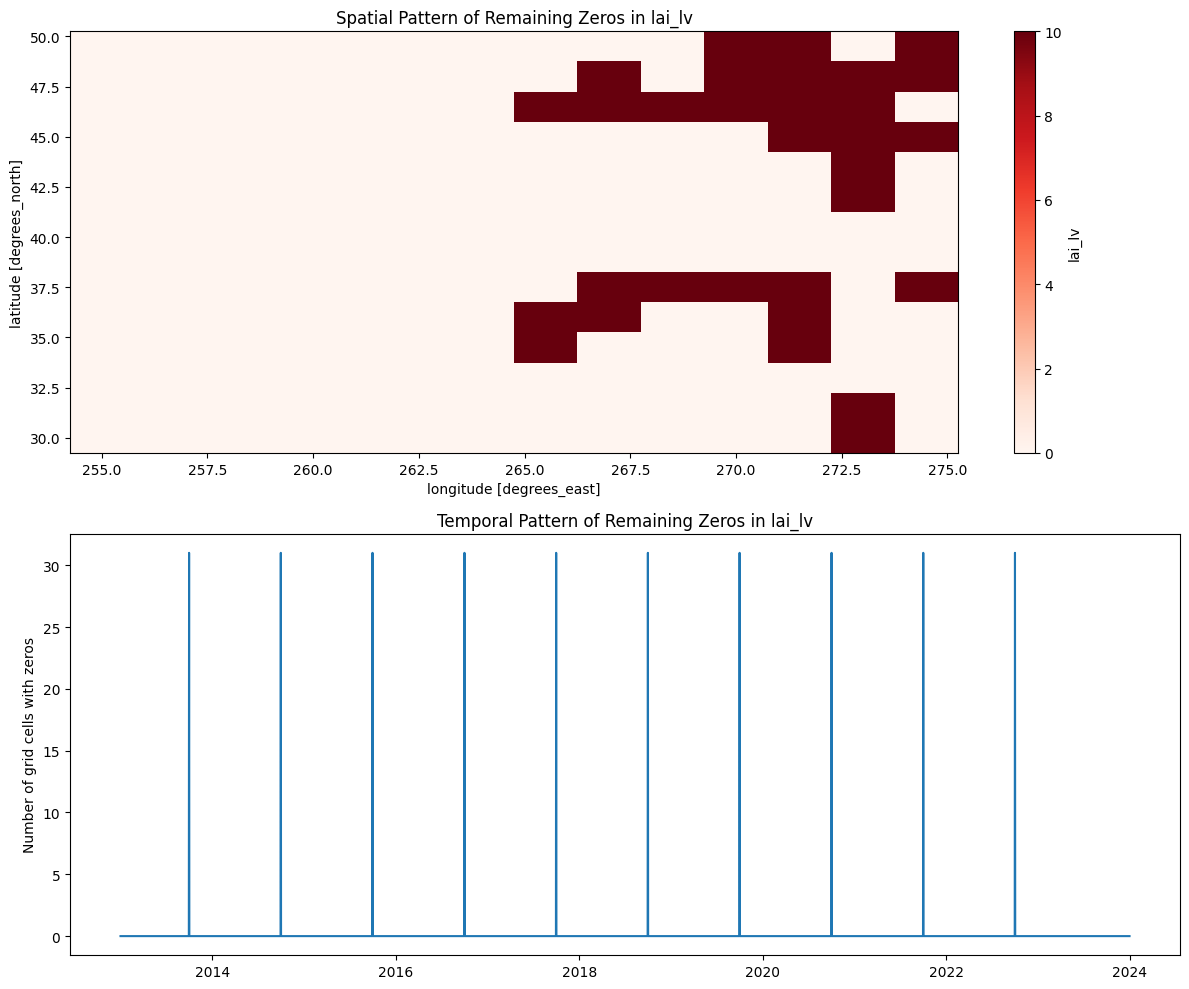

Coordinates of remaining zeros in lai_lv:
Time: 2013-10-01T00:00:00.000000000, Lat: 49.5, Lon: 270.0
Time: 2013-10-01T00:00:00.000000000, Lat: 49.5, Lon: 271.5
Time: 2013-10-01T00:00:00.000000000, Lat: 49.5, Lon: 274.5
Time: 2013-10-01T00:00:00.000000000, Lat: 48.0, Lon: 267.0
Time: 2013-10-01T00:00:00.000000000, Lat: 48.0, Lon: 270.0
Time: 2013-10-01T00:00:00.000000000, Lat: 48.0, Lon: 271.5
Time: 2013-10-01T00:00:00.000000000, Lat: 48.0, Lon: 273.0
Time: 2013-10-01T00:00:00.000000000, Lat: 48.0, Lon: 274.5
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 265.5
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 267.0
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 268.5
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 270.0
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 271.5
Time: 2013-10-01T00:00:00.000000000, Lat: 46.5, Lon: 273.0
Time: 2013-10-01T00:00:00.000000000, Lat: 45.0, Lon: 271.5
Time: 2013-10-01T00:00:00.000000000, Lat: 45.0, Lon: 273.0
Time: 2013-10-

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

filled_ds = xr.open_dataset('/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled.nc')

def visualize_remaining_zeros(ds, variable):
    """
    Visualize the spatial and temporal pattern of remaining zeros.
    """
    # Create a mask of zeros
    zero_mask = (ds[variable] == 0)

    # Sum across time to see spatial pattern
    spatial_pattern = zero_mask.sum(dim='time')

    # Sum across space to see temporal pattern
    temporal_pattern = zero_mask.sum(dim=['latitude', 'longitude'])

    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # Spatial pattern
    spatial_pattern.plot(ax=axs[0], cmap='Reds')
    axs[0].set_title(f'Spatial Pattern of Remaining Zeros in {variable}')

    # Temporal pattern
    axs[1].plot(ds.time, temporal_pattern)
    axs[1].set_title(f'Temporal Pattern of Remaining Zeros in {variable}')
    axs[1].set_ylabel('Number of grid cells with zeros')

    plt.tight_layout()
    plt.show()

    # If there are few enough zeros, we can list the exact coordinates
    if zero_mask.sum() < 1000:
        zero_indices = np.where(zero_mask)
        print(f"Coordinates of remaining zeros in {variable}:")
        for i in range(len(zero_indices[0])):
            t_idx, lat_idx, lon_idx = zero_indices[0][i], zero_indices[1][i], zero_indices[2][i]
            print(f"Time: {ds.time.values[t_idx]}, Lat: {ds.latitude.values[lat_idx]}, Lon: {ds.longitude.values[lon_idx]}")

# Option 1: Fill remaining zeros with global mean/median
def fill_with_global_stats(ds, variable, method='mean'):
    """
    Fill remaining zeros with global statistics.

    Parameters:
    -----------
    ds : xarray.Dataset
        Dataset containing the variable
    variable : str
        Name of the variable to fill
    method : str
        Statistic to use ('mean', 'median', 'min', 'percentile_10')

    Returns:
    --------
    xarray.DataArray
        Variable with zeros replaced
    """
    # Create a copy of the variable
    da = ds[variable].copy(deep=True)

    # Create a mask of non-zero values
    non_zero_mask = (da != 0)

    # Compute the statistic on non-zero values
    if method == 'mean':
        fill_value = da.where(non_zero_mask).mean().item()
    elif method == 'median':
        fill_value = da.where(non_zero_mask).median().item()
    elif method == 'min':
        fill_value = da.where(non_zero_mask).min().item()
    elif method == 'percentile_10':
        # Get the 10th percentile
        fill_value = da.where(non_zero_mask).quantile(0.1).item()
    else:
        raise ValueError(f"Unknown method: {method}")

    print(f"Filling remaining zeros in {variable} with {method}: {fill_value}")

    # Replace zeros with the fill value
    return xr.where(da == 0, fill_value, da)

# Option 2: Fill with regional statistics
def fill_with_regional_stats(ds, variable, region_size=3):
    """
    Fill remaining zeros with statistics from nearby non-zero values.

    Parameters:
    -----------
    ds : xarray.Dataset
        Dataset containing the variable
    variable : str
        Name of the variable to fill
    region_size : int
        Size of the region to consider around each zero

    Returns:
    --------
    xarray.DataArray
        Variable with zeros replaced
    """
    # Create a copy of the variable
    da = ds[variable].copy(deep=True)

    # Find zero values
    zero_mask = (da == 0)
    zero_indices = np.where(zero_mask)

    # Process each zero
    for i in range(len(zero_indices[0])):
        t_idx, lat_idx, lon_idx = zero_indices[0][i], zero_indices[1][i], zero_indices[2][i]

        # Define region bounds
        t_min = max(0, t_idx - region_size)
        t_max = min(len(da.time) - 1, t_idx + region_size)
        lat_min = max(0, lat_idx - region_size)
        lat_max = min(len(da.latitude) - 1, lat_idx + region_size)
        lon_min = max(0, lon_idx - region_size)
        lon_max = min(len(da.longitude) - 1, lon_idx + region_size)

        # Extract region
        region = da.isel(
            time=slice(t_min, t_max + 1),
            latitude=slice(lat_min, lat_max + 1),
            longitude=slice(lon_min, lon_max + 1)
        )

        # Compute regional mean of non-zero values
        region_non_zero = region.where(region != 0)
        region_mean = region_non_zero.mean().item()

        # If region has no non-zero values, use a smaller region or global mean
        if np.isnan(region_mean):
            # Try global mean of same month
            month = pd.Timestamp(da.time.values[t_idx]).month
            month_mask = np.array([pd.Timestamp(t).month == month for t in da.time.values])
            month_data = da.isel(time=month_mask)
            month_mean = month_data.where(month_data != 0).mean().item()

            if np.isnan(month_mean):
                # Use global mean as last resort
                global_mean = da.where(da != 0).mean().item()
                da.values[t_idx, lat_idx, lon_idx] = global_mean
            else:
                da.values[t_idx, lat_idx, lon_idx] = month_mean
        else:
            da.values[t_idx, lat_idx, lon_idx] = region_mean

    return da

# Option 3: Determine if the remaining zeros might be meaningful
def analyze_zero_context(ds, variable, threshold=0.1):
    """
    Analyze the context of remaining zeros to determine if they might be meaningful.

    Parameters:
    -----------
    ds : xarray.Dataset
        Dataset containing the variable
    variable : str
        Name of the variable to check
    threshold : float
        Threshold for considering a region "low-valued"

    Returns:
    --------
    dict
        Statistics about the zeros
    """
    # Create mask of zeros
    zero_mask = (ds[variable] == 0)
    zero_indices = np.where(zero_mask)

    # Track statistics
    stats = {
        'total_zeros': zero_mask.sum().item(),
        'zeros_in_low_regions': 0,
        'isolated_zeros': 0,
        'edge_zeros': 0
    }

    # Check number of zeros at domain edges
    edge_mask = zero_mask.copy()

    # Define edge indices
    time_edges = [0, len(ds.time) - 1]
    lat_edges = [0, len(ds.latitude) - 1]
    lon_edges = [0, len(ds.longitude) - 1]

    # Check each zero
    for i in range(len(zero_indices[0])):
        t_idx, lat_idx, lon_idx = zero_indices[0][i], zero_indices[1][i], zero_indices[2][i]

        # Check if at edge
        if (t_idx in time_edges) or (lat_idx in lat_edges) or (lon_idx in lon_edges):
            stats['edge_zeros'] += 1

        # Define region bounds
        t_min = max(0, t_idx - 1)
        t_max = min(len(ds.time) - 1, t_idx + 1)
        lat_min = max(0, lat_idx - 1)
        lat_max = min(len(ds.latitude) - 1, lat_idx + 1)
        lon_min = max(0, lon_idx - 1)
        lon_max = min(len(ds.longitude) - 1, lon_idx + 1)

        # Extract surrounding region
        region = ds[variable].isel(
            time=slice(t_min, t_max + 1),
            latitude=slice(lat_min, lat_max + 1),
            longitude=slice(lon_min, lon_max + 1)
        )

        # Check if region has other zeros
        other_zeros = (region == 0).sum().item() - 1  # Subtract the zero itself

        # Check if region has low values
        low_values = (region > 0) & (region < threshold)
        low_count = low_values.sum().item()

        # Check if this is an isolated zero or in a low-valued region
        if other_zeros == 0 and low_count == 0:
            stats['isolated_zeros'] += 1
        elif low_count > 0:
            stats['zeros_in_low_regions'] += 1

    return stats

# Final filling approach
def fill_remaining_zeros(ds, variables=['lai_lv'], method='regional', save_path=None):
    """
    Apply the most appropriate method to fill remaining zeros.

    Parameters:
    -----------
    ds : xarray.Dataset
        Dataset containing the variables
    variables : list
        Names of variables to process
    method : str
        Method to use ('global', 'regional', 'smart')
    save_path : str, optional
        Path to save the result

    Returns:
    --------
    xarray.Dataset
        Dataset with zeros filled
    """
    # Create a copy of the dataset
    result_ds = ds.copy(deep=True)

    for variable in variables:
        print(f"\nProcessing remaining zeros in {variable}...")

        # Count zeros
        zero_count = (result_ds[variable] == 0).sum().item()
        print(f"Found {zero_count} zeros")

        if zero_count == 0:
            print(f"No zeros in {variable}. Skipping.")
            continue

        # Visualize pattern of zeros
        visualize_remaining_zeros(result_ds, variable)

        # Analyze zeros to see if they might be meaningful
        if method == 'smart':
            stats = analyze_zero_context(result_ds, variable)
            print(f"Zero statistics: {stats}")

            # Decide on method based on analysis
            if stats['zeros_in_low_regions'] / stats['total_zeros'] > 0.5:
                print("Most zeros are in low-valued regions. Using global minimum.")
                result_ds[variable] = fill_with_global_stats(result_ds, variable, method='min')
            elif stats['isolated_zeros'] / stats['total_zeros'] > 0.5:
                print("Most zeros are isolated. Using regional statistics.")
                result_ds[variable] = fill_with_regional_stats(result_ds, variable)
            else:
                print("Using global median.")
                result_ds[variable] = fill_with_global_stats(result_ds, variable, method='median')

        elif method == 'global':
            # Use global statistics
            result_ds[variable] = fill_with_global_stats(result_ds, variable, method='median')

        elif method == 'regional':
            # Use regional statistics
            result_ds[variable] = fill_with_regional_stats(result_ds, variable)

        else:
            raise ValueError(f"Unknown method: {method}")

        # Verify zeros are filled
        zero_count_after = (result_ds[variable] == 0).sum().item()
        print(f"Zeros remaining after filling: {zero_count_after}")

    # Save if requested
    if save_path:
        print(f"Saving filled dataset to {save_path}")
        result_ds.to_netcdf(save_path)

    return result_ds


filled_ds = xr.open_dataset('/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled.nc')

# Fill the remaining zeros in lai_hv and lai_lv using the smart approach
final_ds = fill_remaining_zeros(
    ds=filled_ds,
    variables=['lai_lv'],
    method='smart',  # Options: 'global', 'regional', 'smart'
    save_path='/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled_complete.nc'
)

# Verify all zeros are filled
for var in ['lai_lv']:
    remaining_zeros = (final_ds[var] == 0).sum().item()
    print(f"{var}: {remaining_zeros} zeros remaining")


##Recheck zeros

In [ ]:
# Load the filled dataset
filled_ds = xr.open_dataset('/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled_complete.nc')

# Check that zeros were filled
for var in ['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']:
    remaining_zeros = (filled_ds[var] == 0).sum().item()
    print(f"{var}: {remaining_zeros} zeros remaining")

z500: 0 zeros remaining
t850: 0 zeros remaining
e: 0 zeros remaining
evavt: 0 zeros remaining
lai_lv: 0 zeros remaining
pev: 0 zeros remaining
swvl2: 0 zeros remaining
swvl3: 0 zeros remaining
t2m: 0 zeros remaining
tp: 0 zeros remaining


#Separate and Normalize

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import zipfile
from pathlib import Path
import matplotlib.pyplot as plt

nc_file_path = "/content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled_complete.nc"
norm_zip_path = "/content/drive/MyDrive/climatology_norm.zip"
climatology_dir = "/content/drive/MyDrive/climatology"
output_dir = "/content/drive/MyDrive/drought_data/processed"

os.makedirs(output_dir, exist_ok=True)
os.makedirs(climatology_dir, exist_ok=True)

# Extract normalization files from zip if needed
if not os.path.exists(os.path.join(climatology_dir, "era5_mean.csv")):
    print(f"Extracting normalization files from {norm_zip_path}")
    with zipfile.ZipFile(norm_zip_path, 'r') as zip_ref:
        zip_ref.extractall(climatology_dir)

# List extracted files
norm_files = list(Path(climatology_dir).glob("*.csv"))
print(f"Using {len(norm_files)} normalization files: {[f.name for f in norm_files]}")

# Load normalization parameters
era5_mean = pd.read_csv(os.path.join(climatology_dir, "era5_mean.csv"))
era5_sigma = pd.read_csv(os.path.join(climatology_dir, "era5_sigma.csv"))
lra5_mean = pd.read_csv(os.path.join(climatology_dir, "lra5_mean.csv"))
lra5_sigma = pd.read_csv(os.path.join(climatology_dir, "lra5_sigma.csv"))

# Create mapping dictionaries
era5_mean_dict = dict(zip(era5_mean["param"], era5_mean["mean"]))
era5_sigma_dict = dict(zip(era5_sigma["param"], era5_sigma["sigma"]))
lra5_mean_dict = dict(zip(lra5_mean["param"], lra5_mean["mean"]))
lra5_sigma_dict = dict(zip(lra5_sigma["param"], lra5_sigma["sigma"]))

# Updated variable mapping for the 10 variables
variable_mapping = {
    # Atmospheric variables with levels
    'z500': 'z-500',
    't850': 't-850',

    # Surface and land variables
    'e': 'e',
    'evavt': 'evavt',
    'lai_lv': 'lai_lv',
    'pev': 'pev',
    'swvl2': 'swvl2',
    'swvl3': 'swvl3',
    't2m': 't2m',
    'tp': 'tp'
}

# Load the full dataset
print(f"Loading dataset from {nc_file_path}")
ds = xr.open_dataset(nc_file_path)
print(f"Dataset time range: {ds.time.values[0]} to {ds.time.values[-1]}")
print(f"Total time steps: {len(ds.time)}")

# Get the list of variables in the dataset
available_vars = list(ds.data_vars)
print(f"\nAvailable variables in dataset: {available_vars}")

# Function to normalize a dataset
def normalize_dataset(dataset, name):
    """Normalize a dataset using the pre-loaded normalization parameters"""
    print(f"\nNormalizing {name} dataset...")
    dataset_normalized = dataset.copy(deep=True)
    normalized_vars = []

    for var in dataset.data_vars:
        match_found = False

        # Try standard mapping
        if var in variable_mapping:
            mapped_var = variable_mapping[var]

            # Check if it's in ERA5 (atmospheric variables)
            if mapped_var in era5_mean_dict:
                mean_val = era5_mean_dict[mapped_var]
                sigma_val = era5_sigma_dict[mapped_var]

                # Normalize
                dataset_normalized[var] = (dataset[var] - mean_val) / sigma_val
                normalized_vars.append(f"{var} (ERA5 {mapped_var})")
                match_found = True

            # Check if it's in LRA5 (land variables)
            elif mapped_var in lra5_mean_dict:
                mean_val = lra5_mean_dict[mapped_var]
                sigma_val = lra5_sigma_dict[mapped_var]

                # Normalize
                dataset_normalized[var] = (dataset[var] - mean_val) / sigma_val
                normalized_vars.append(f"{var} (LRA5 {mapped_var})")
                match_found = True

        # If no match through mapping, try direct matching in LRA5
        if not match_found:
            if var in lra5_mean_dict:
                mean_val = lra5_mean_dict[var]
                sigma_val = lra5_sigma_dict[var]

                # Normalize
                dataset_normalized[var] = (dataset[var] - mean_val) / sigma_val
                normalized_vars.append(f"{var} (direct LRA5)")
                match_found = True

        if not match_found:
            print(f"WARNING: No normalization parameters found for {var}")
            # Fallback to standard normalization using the variable's own statistics
            print(f"  Using variable's own statistics for {var}")
            mean_val = float(dataset[var].mean().values)
            sigma_val = float(dataset[var].std().values)
            if sigma_val < 1e-10:  # Avoid division by zero
                sigma_val = 1.0
                print(f"  WARNING: {var} has near-zero standard deviation, using sigma=1.0")

            dataset_normalized[var] = (dataset[var] - mean_val) / sigma_val
            normalized_vars.append(f"{var} (own stats)")

    print(f"Normalized {len(normalized_vars)} variables in {name} dataset")
    for nv in normalized_vars:
        print(f"  - {nv}")
    return dataset_normalized

# Split the dataset according to the specified criteria:
# - 2010-2022: 70% training, 30% validation
# - 2023: test set

# First, convert time to datetime for easier filtering
ds['time'] = pd.to_datetime(ds.time.values)

# Split into time periods
ds_2010_2022 = ds.sel(time=slice('2010-01-01', '2022-12-31'))
ds_2023 = ds.sel(time=slice('2023-01-01', '2023-12-31'))

# Calculate the number of samples for training period within 2010-2022
total_samples_2010_2022 = len(ds_2010_2022.time)
train_samples = int(total_samples_2010_2022 * 0.7)

# Create the final splits
ds_train = ds_2010_2022.isel(time=slice(0, train_samples))
ds_val = ds_2010_2022.isel(time=slice(train_samples, None))
ds_test = ds_2023

print(f"\nSplit dataset:")
print(f"Training set: {len(ds_train.time)} time steps ({ds_train.time.values[0]} to {ds_train.time.values[-1]})")
print(f"Validation set: {len(ds_val.time)} time steps ({ds_val.time.values[0]} to {ds_val.time.values[-1]})")
print(f"Test set: {len(ds_test.time)} time steps ({ds_test.time.values[0]} to {ds_test.time.values[-1]})")

# Normalize each dataset
ds_train_norm = normalize_dataset(ds_train, "training")
ds_val_norm = normalize_dataset(ds_val, "validation")
ds_test_norm = normalize_dataset(ds_test, "test")

# Save each dataset
train_path = os.path.join(output_dir, "drought_train_normalized_imp.nc")
val_path = os.path.join(output_dir, "drought_val_normalized_imp.nc")
test_path = os.path.join(output_dir, "drought_test_normalized_imp.nc")

print("\nSaving normalized datasets...")
ds_train_norm.to_netcdf(train_path)
ds_val_norm.to_netcdf(val_path)
ds_test_norm.to_netcdf(test_path)

print(f"Saved training set to: {train_path}")
print(f"Saved validation set to: {val_path}")
print(f"Saved test set to: {test_path}")

# Create a visualization to verify the normalization
def plot_normalization_example(original_var, normalized_var, var_name):
    """Plot original vs normalized variable to verify normalization"""
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    original_var.isel(time=0).plot()
    plt.title(f"Original {var_name}")

    plt.subplot(1, 2, 2)
    normalized_var.isel(time=0).plot()
    plt.title(f"Normalized {var_name}")

    plt.suptitle(f"Normalization Example: {var_name}")
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(output_dir, f"normalization_example_{var_name}.png"))
    plt.close()

# Create plots for all variables
for var in variable_mapping.keys():
    if var in ds.data_vars:
        plot_normalization_example(ds_train[var], ds_train_norm[var], var)
        print(f"Created normalization visualization for {var}")

# Create a summary report
summary = {
    'Variable': [],
    'Train Original Mean': [], 'Train Original Std': [],
    'Train Normalized Mean': [], 'Train Normalized Std': [],
    'Val Normalized Mean': [], 'Val Normalized Std': [],
    'Test Normalized Mean': [], 'Test Normalized Std': []
}

for var in ds.data_vars:
    summary['Variable'].append(var)

    # Original stats
    summary['Train Original Mean'].append(float(ds_train[var].mean().values))
    summary['Train Original Std'].append(float(ds_train[var].std().values))

    # Normalized stats
    summary['Train Normalized Mean'].append(float(ds_train_norm[var].mean().values))
    summary['Train Normalized Std'].append(float(ds_train_norm[var].std().values))
    summary['Val Normalized Mean'].append(float(ds_val_norm[var].mean().values))
    summary['Val Normalized Std'].append(float(ds_val_norm[var].std().values))
    summary['Test Normalized Mean'].append(float(ds_test_norm[var].mean().values))
    summary['Test Normalized Std'].append(float(ds_test_norm[var].std().values))

# Create and save summary dataframe
summary_df = pd.DataFrame(summary)
summary_path = os.path.join(output_dir, "normalization_summary.csv")
summary_df.to_csv(summary_path, index=False)
print(f"\nSaved normalization summary to: {summary_path}")
print("\nNormalization process complete!")

Using 5 normalization files: ['era5_sigma.csv', 'parameter_info.csv', 'lra5_sigma.csv', 'lra5_mean.csv', 'era5_mean.csv']
Loading dataset from /content/drive/MyDrive/drought_data/interpolated_imp/chaosbench_drought_imp_variables_filled_complete.nc
Dataset time range: 2013-01-01T00:00:00.000000000 to 2023-12-31T00:00:00.000000000
Total time steps: 4017

Available variables in dataset: ['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']

Split dataset:
Training set: 2556 time steps (2013-01-01T00:00:00.000000000 to 2019-12-31T00:00:00.000000000)
Validation set: 1096 time steps (2020-01-01T00:00:00.000000000 to 2022-12-31T00:00:00.000000000)
Test set: 365 time steps (2023-01-01T00:00:00.000000000 to 2023-12-31T00:00:00.000000000)

Normalizing training dataset...
Normalized 10 variables in training dataset
  - z500 (ERA5 z-500)
  - t850 (ERA5 t-850)
  - e (LRA5 e)
  - evavt (LRA5 evavt)
  - lai_lv (LRA5 lai_lv)
  - pev (LRA5 pev)
  - swvl2 (LRA5 swvl2)
  - swvl3 

#Check normalized data

In [ ]:
import xarray as xr
import pandas as pd

nc_file_path = "/content/drive/MyDrive/drought_data/processed/drought_train_normalized_imp.nc"

# Open the dataset
ds = xr.open_dataset(nc_file_path)

# Display basic info about the dataset
print("Dataset info:")
print(ds.info())

# List all variables in the dataset
print("\nVariables in the dataset:")
print(list(ds.data_vars))

# Get dimensions
print("\nDimensions:")
for dim_name, dim_size in ds.dims.items():
    print(f"{dim_name}: {dim_size}")

# Display the first few rows with all variables
print("\nFirst few time steps with all variables:")
# Convert the first 5 time steps to a dataframe
df_all = ds.isel(time=slice(0, 5)).to_dataframe().reset_index()

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 20)

# Show the first 10 rows of the dataframe
print(df_all.head(10))

# Reset display options
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')
pd.reset_option('max_colwidth')

# Close the dataset when done
ds.close()

Dataset info:
xarray.Dataset {
dimensions:
	time = 2556 ;
	latitude = 14 ;
	longitude = 14 ;

variables:
	float32 z500(time, latitude, longitude) ;
	float64 t850(time, latitude, longitude) ;
	float32 e(time, latitude, longitude) ;
	float32 evavt(time, latitude, longitude) ;
	float32 lai_lv(time, latitude, longitude) ;
	float32 pev(time, latitude, longitude) ;
	float32 swvl2(time, latitude, longitude) ;
	float32 swvl3(time, latitude, longitude) ;
	float32 t2m(time, latitude, longitude) ;
	float32 tp(time, latitude, longitude) ;
	datetime64[ns] time(time) ;
	float32 latitude(latitude) ;
	float32 longitude(longitude) ;

// global attributes:
}None

Variables in the dataset:
['z500', 't850', 'e', 'evavt', 'lai_lv', 'pev', 'swvl2', 'swvl3', 't2m', 'tp']

Dimensions:
time: 2556
latitude: 14
longitude: 14

First few time steps with all variables:
        time  latitude  longitude      z500      t850         e     evavt    lai_lv       pev     swvl2     swvl3       t2m        tp
0 2013-01-01  

<ipython-input-32-985cba254017>:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, dim_size in ds.dims.items():
<frozen _collections_abc>:861: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


##Previos code snippet for data normalization. Don't use it.

In [ ]:
file_path = "/content/drive/MyDrive/drought_data/processed/drought_val_normalized.nc"
ds = xr.open_dataset(file_path)

df = ds.to_dataframe().reset_index()

print(df.head())

        time  latitude  longitude      z500      z850      t500      t850  \
0 2020-01-01      49.5      255.0 -0.243828 -0.596642  0.021983  0.136133   
1 2020-01-01      49.5      256.5 -0.279996 -0.626418 -0.087816  0.078711   
2 2020-01-01      49.5      258.0 -0.311824 -0.662816 -0.192776  0.105466   
3 2020-01-01      49.5      259.5 -0.337865 -0.666126 -0.263253 -0.051910   
4 2020-01-01      49.5      261.0 -0.365353 -0.646272 -0.283519 -0.049638   

       q500      q850      u500  ...       t2m       d2m       u10       v10  \
0 -0.161108 -0.470518  0.987582  ...  1.416598  1.446731  2.108587  0.598552   
1  0.067948 -0.413620  1.206211  ...  1.412940  1.444046  1.693992  0.658387   
2  0.053548 -0.493774  1.015192  ...  1.400384  1.432465  2.084337  0.553182   
3 -0.381793 -0.488803  0.767826  ...  1.390587  1.419058  1.543017  1.390877   
4 -0.195266 -0.505846  0.975467  ...  1.378493  1.407624  0.952022  1.470767   

         tp       pev     swvl1      ssrd    lai_hv    l